# **Diabetes Detection**


## **Problem Statement**
The rising prevalence of diabetes worldwide necessitates the development of accurate and reliable predictive models to aid in early detection and intervention. In response to this need, our project focuses on constructing a machine learning-based diabetes detection model using a gradient boosting classifier. The primary objective is to create a robust model that can effectively distinguish between diabetic and non-diabetic individuals.

## Features Information
**Diabetes**: Binary variable indicating whether the person has diabetes (1 for Yes, 0 for No). It is dependent/target  variable.

**HighBP**: Binary variable indicating whether the person has high blood pressure (1 for Yes, 0 for No).

**HighChol**: Binary variable indicating whether the person has high cholesterol (1 for Yes, 0 for No).

**CholCheck**: Binary variable indicating whether the person regularly checks their cholesterol (1 for Yes, 0 for No).

**BMI**: Body Mass Index, a numerical measure of body fat based on height and weight.

**Smoker**: Binary variable indicating whether the person is a smoker (1 for Yes, 0 for No

**Stroke**: Binary variable indicating whether the person has had a stroke (1 for Yes, 0 for No).

**HeartDiseaseorAttack**: Binary variable indicating whether the person has had heart disease or heart attack (1 for Yes, 0 for No).

**PhysActivity**: Level of physical activity.

**Fruits**: Binary variable indicating whether the person consumed fruits.

**Veggies**: Number of vegetables consumed.

**HvyAlcoholConsump**: Binary variable indicating whether the person has heavy alcohol consumption (1 for Yes, 0 for No).

**AnyHealthcare**: Binary variable indicating whether the person has any healthcare coverage (1 for Yes, 0 for No).

**NoDocbcCost**: Binary variable indicating whether the person did not see a doctor due to cost (1 for Yes, 0 for No).

**GenHlth**: General health rating.

**MentHlth**: Mental health rating.

**PhysHlth**: Physical health rating.

**DiffWalk**: Binary variable indicating whether the person has difficulty walking (1 for Yes, 0 for No).

**Sex**: Gender of the person.

**Age**: Age of the person.

**Education**: Level of education.

**Income**: Income level.

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
%cd /gdrive/My Drive/ML_Datasets/

/gdrive/My Drive/ML_Datasets


# **Context**
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well.

# **Import packages**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

## Reading file

In [6]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

In [7]:
df.tail()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[5 rows x 22 columns]

# **Feature Engineering**

In [8]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
df.Diabetes_binary.value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [10]:
# Lets check the shape of the data
df.shape

(70692, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## Here Our values of target variable is in the form of flote ie 1.0 and 0.0 Les convert into 1 and 0

In [12]:
df['Diabetes_binary']=df['Diabetes_binary'].apply(lambda x: 1 if x == 1.0 else 0)

In [13]:
df['Diabetes_binary'].value_counts()

0    35346
1    35346
Name: Diabetes_binary, dtype: int64

In [14]:
df

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                    0     1.0       0.0        1.0  26.0     0.0     0.0   
1                    0     1.0       1.0        1.0  26.0     1.0     1.0   
2                    0     0.0       0.0        1.0  26.0     0.0     0.0   
3                    0     1.0       1.0        1.0  28.0     1.0     0.0   
4                    0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687                1     0.0       1.0        1.0  37.0     0.0     0.0   
70688                1     0.0       1.0        1.0  29.0     1.0     0.0   
70689                1     1.0       1.0        1.0  25.0     0.0     0.0   
70690                1     1.0       1.0        1.0  18.0     0.0     0.0   
70691                1     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           1.0     0.0  ...            1.0   
1                       0.0           0.0     1.0  ...            1.0   
2                       0.0           1.0     1.0  ...            1.0   
3                       0.0           1.0     1.0  ...            1.0   
4                       0.0           1.0     1.0  ...            1.0   
...                     ...           ...     ...  ...            ...   
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0              0.0      3.0       5.0      30.0       0.0  1.0   4.0   
1              0.0      3.0       0.0       0.0       0.0  1.0  12.0   
2              0.0      1.0       0.0      10.0       0.0  1.0  13.0   
3              0.0      3.0       0.0       3.0       0.0  1.0  11.0   
4              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
...            ...      ...       ...       ...       ...  ...   ...   
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
0            6.0     8.0  
1            6.0     8.0  
2            6.0     8.0  
3            6.0     8.0  
4            5.0     8.0  
...          ...     ...  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[70692 rows x 22 columns]

In [15]:
## Lets check the datatype of all variable using info() function

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  int64  
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## **Observation:**
* There are 70692 rows and 22 columns
* In our datasets we have all columns in numeric form <br>
* Here 'Diabetes_binary' is our dependent/target variable

In [17]:
# Lets change the name  our target variable
df.rename(columns = {'Diabetes_binary':'Diabetes'},inplace=True)

## Checking missing values in our data

In [18]:
df.isna().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Lets check the statistical Summary

In [19]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
Diabetes              70692.0   0.500000   0.500004   0.0   0.0   0.5   1.0   
HighBP                70692.0   0.563458   0.495960   0.0   0.0   1.0   1.0   
HighChol              70692.0   0.525703   0.499342   0.0   0.0   1.0   1.0   
CholCheck             70692.0   0.975259   0.155336   0.0   1.0   1.0   1.0   
BMI                   70692.0  29.856985   7.113954  12.0  25.0  29.0  33.0   
Smoker                70692.0   0.475273   0.499392   0.0   0.0   0.0   1.0   
Stroke                70692.0   0.062171   0.241468   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  70692.0   0.147810   0.354914   0.0   0.0   0.0   0.0   
PhysActivity          70692.0   0.703036   0.456924   0.0   0.0   1.0   1.0   
Fruits                70692.0   0.611795   0.487345   0.0   0.0   1.0   1.0   
Veggies               70692.0   0.788774   0.408181   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     70692.0   0.042721   0.202228   0.0   0.0   0.0   0.0   
AnyHealthcare         70692.0   0.954960   0.207394   0.0   1.0   1.0   1.0   
NoDocbcCost           70692.0   0.093914   0.291712   0.0   0.0   0.0   0.0   
GenHlth               70692.0   2.837082   1.113565   1.0   2.0   3.0   4.0   
MentHlth              70692.0   3.752037   8.155627   0.0   0.0   0.0   2.0   
PhysHlth              70692.0   5.810417  10.062261   0.0   0.0   0.0   6.0   
DiffWalk              70692.0   0.252730   0.434581   0.0   0.0   0.0   1.0   
Sex                   70692.0   0.456997   0.498151   0.0   0.0   0.0   1.0   
Age                   70692.0   8.584055   2.852153   1.0   7.0   9.0  11.0   
Education             70692.0   4.920953   1.029081   1.0   4.0   5.0   6.0   
Income                70692.0   5.698311   2.175196   1.0   4.0   6.0   8.0   

                       max  
Diabetes               1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [20]:
df.T

0      1      2      3      4      5      6      7      \
Diabetes                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
HighBP                  1.0    1.0    0.0    1.0    0.0    0.0    0.0    0.0   
HighChol                0.0    1.0    0.0    1.0    0.0    0.0    1.0    0.0   
CholCheck               1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
BMI                    26.0   26.0   26.0   28.0   29.0   18.0   26.0   31.0   
Smoker                  0.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0   
Stroke                  0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
HeartDiseaseorAttack    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
PhysActivity            1.0    0.0    1.0    1.0    1.0    1.0    1.0    0.0   
Fruits                  0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
Veggies                 1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0   
HvyAlcoholConsump       0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
AnyHealthcare           1.0    1.0    1.0    1.0    1.0    0.0    1.0    1.0   
NoDocbcCost             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
GenHlth                 3.0    3.0    1.0    3.0    2.0    2.0    1.0    4.0   
MentHlth                5.0    0.0    0.0    0.0    0.0    7.0    0.0    0.0   
PhysHlth               30.0    0.0   10.0    3.0    0.0    0.0    0.0    0.0   
DiffWalk                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Sex                     1.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0   
Age                     4.0   12.0   13.0   11.0    8.0    1.0   13.0    6.0   
Education               6.0    6.0    6.0    6.0    5.0    4.0    5.0    4.0   
Income                  8.0    8.0    8.0    8.0    8.0    7.0    6.0    3.0   

                      8      9      ...  70682  70683  70684  70685  70686  \
Diabetes                0.0    0.0  ...    1.0    1.0    1.0    1.0    1.0   
HighBP                  0.0    0.0  ...    1.0    1.0    1.0    1.0    0.0   
HighChol                0.0    0.0  ...    0.0    0.0    1.0    0.0    1.0   
CholCheck               1.0    1.0  ...    1.0    1.0    1.0    1.0    1.0   
BMI                    32.0   27.0  ...   37.0   28.0   27.0   38.0   27.0   
Smoker                  0.0    1.0  ...    0.0    0.0    0.0    0.0    0.0   
Stroke                  0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
HeartDiseaseorAttack    0.0    0.0  ...    0.0    0.0    1.0    0.0    0.0   
PhysActivity            1.0    0.0  ...    0.0    0.0    1.0    1.0    1.0   
Fruits                  1.0    1.0  ...    0.0    0.0    0.0    0.0    1.0   
Veggies                 1.0    1.0  ...    0.0    1.0    1.0    1.0    0.0   
HvyAlcoholConsump       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
AnyHealthcare           1.0    1.0  ...    1.0    1.0    1.0    1.0    1.0   
NoDocbcCost             0.0    0.0  ...    0.0    0.0    1.0    0.0    0.0   
GenHlth                 3.0    3.0  ...    4.0    2.0    4.0    4.0    4.0   
MentHlth                0.0    0.0  ...    0.0    0.0   30.0    0.0    0.0   
PhysHlth                0.0    6.0  ...   30.0    0.0    5.0    0.0   30.0   
DiffWalk                0.0    0.0  ...    1.0    0.0    0.0    0.0    0.0   
Sex                     0.0    1.0  ...    0.0    0.0    1.0    0.0    1.0   
Age                     3.0    6.0  ...    9.0   10.0    9.0    7.0   11.0   
Education               6.0    4.0  ...    2.0    4.0    4.0    6.0    2.0   
Income                  8.0    4.0  ...    1.0    3.0    5.0    2.0    3.0   

                      70687  70688  70689  70690  70691  
Diabetes                1.0    1.0    1.0    1.0    1.0  
HighBP                  0.0    0.0    1.0    1.0    1.0  
HighChol                1.0    1.0    1.0    1.0    1.0  
CholCheck               1.0    1.0    1.0    1.0    1.0  
BMI                    37.0   29.0   25.0   18.0   25.0  
Smoker                  0.0    1.0    

We see that the all observations are in the form of decimals but we dont need it . We convert it into integer form to make our data more reliable.

In [21]:
df = df.applymap(lambda x : int(x))
df

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         0          1   26       0       0   
1             0       1         1          1   26       1       1   
2             0       0         0          1   26       0       0   
3             0       1         1          1   28       1       0   
4             0       0         0          1   29       1       0   
...         ...     ...       ...        ...  ...     ...     ...   
70687         1       0         1          1   37       0       0   
70688         1       0         1          1   29       1       0   
70689         1       1         1          1   25       0       0   
70690         1       1         1          1   18       0       0   
70691         1       1         1          1   25       0       0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                         0             1       0  ...              1   
1                         0             0       1  ...              1   
2                         0             1       1  ...              1   
3                         0             1       1  ...              1   
4                         0             1       1  ...              1   
...                     ...           ...     ...  ...            ...   
70687                     0             0       0  ...              1   
70688                     1             0       1  ...              1   
70689                     1             0       1  ...              1   
70690                     0             0       0  ...              1   
70691                     1             1       1  ...              1   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0                0        3         5        30         0    1    4   
1                0        3         0         0         0    1   12   
2                0        1         0        10         0    1   13   
3                0        3         0         3         0    1   11   
4                0        2         0         0         0    0    8   
...            ...      ...       ...       ...       ...  ...  ...   
70687            0        4         0         0         0    0    6   
70688            0        2         0         0         1    1   10   
70689            0        5        15         0         1    0   13   
70690            0        4         0         0         1    0   11   
70691            0        2         0         0         0    0    9   

       Education  Income  
0              6       8  
1              6       8  
2              6       8  
3              6       8  
4              5       8  
...          ...     ...  
70687          4       1  
70688          3       6  
70689          6       4  
70690          2       4  
70691          6       2  

[70692 rows x 22 columns]

### Now our data is looking good

# **Let's move forward to EDA**

In [22]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(8,8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """

    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red',orient='h') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    ax_hist2.set_xticks(np.arange(min(feature), max(feature)+1, 1))
    plt.figure(figsize=(20,10))
    plt.show()


In [23]:
# Lets, checks the columns again
df.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### For independent variable

<Axes: xlabel='Age', ylabel='Count'>

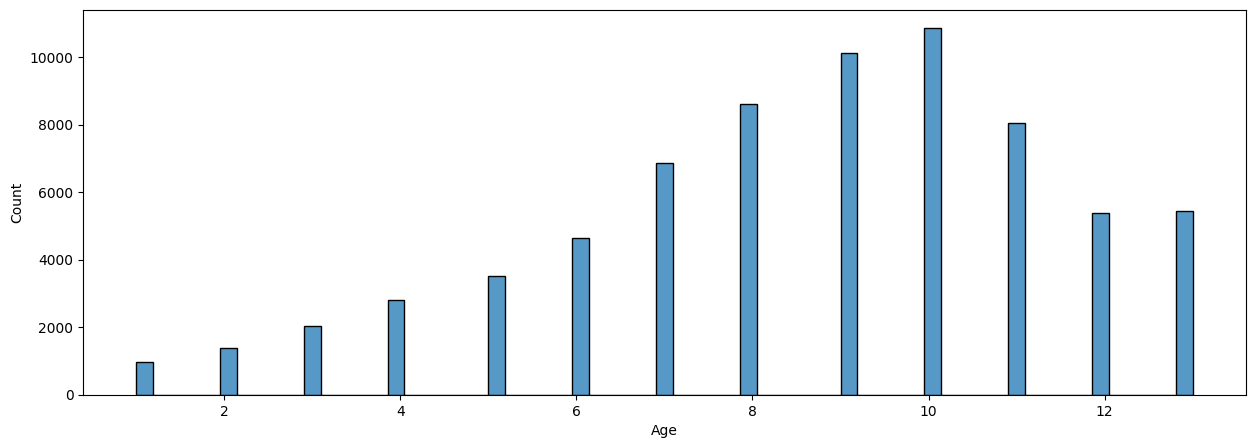

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(df.Age)

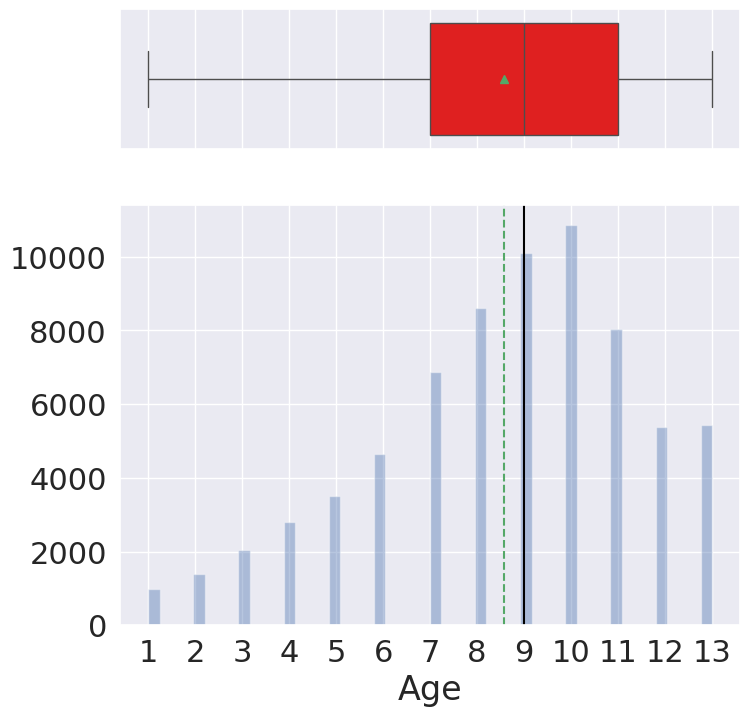

<Figure size 2000x1000 with 0 Axes>

In [25]:
histogram_boxplot(df.Age)

### Observation
* The number of people appears to increase with age. At age 8, there are about 2,000 people. At age 10, there are about 4,000 people. And at age 12, there are about 6,000 people.
* It is important to note that this is just a small sample of data, and it may not be representative of the population as a whole.

<Axes: xlabel='BMI', ylabel='Density'>

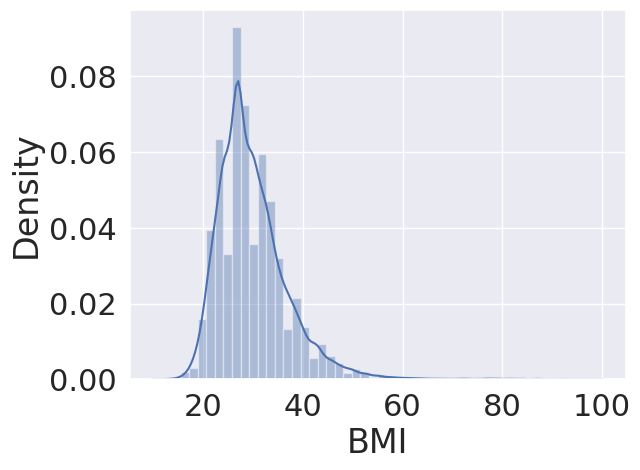

In [26]:
sns.distplot(df.BMI)

<Axes: ylabel='BMI'>

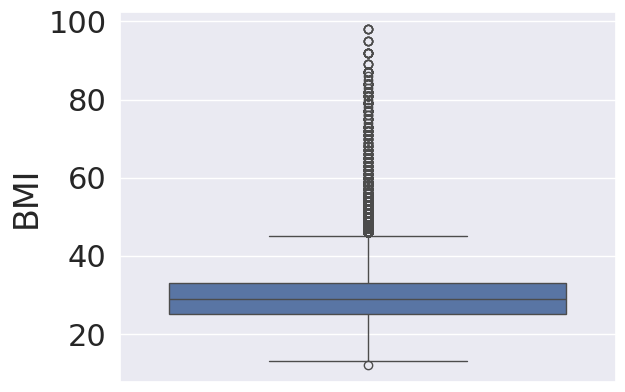

In [27]:
sns.boxplot(df.BMI)

### Here our BMI data is lookd like Right skew
We Can  normalised it during data preprossing

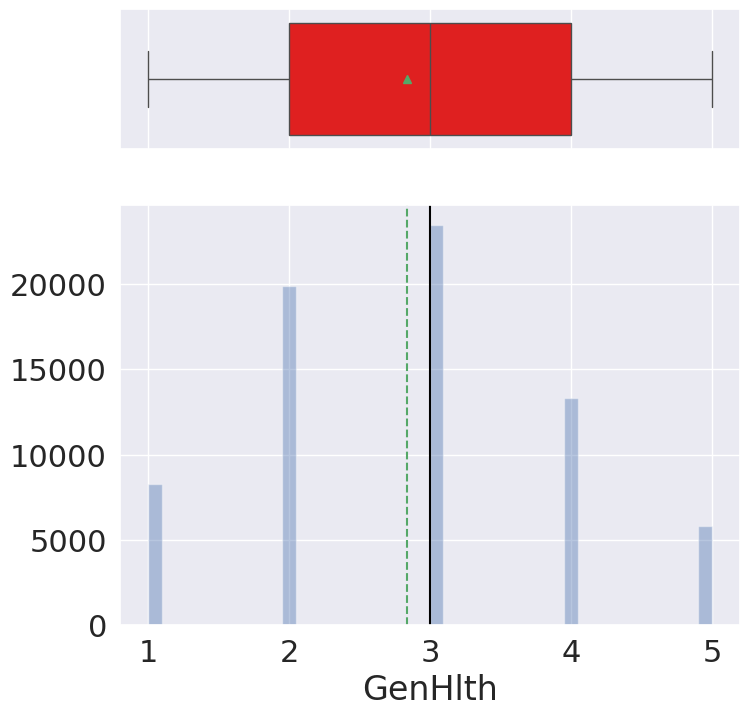

<Figure size 2000x1000 with 0 Axes>

In [28]:
histogram_boxplot(df.GenHlth)

### **Observation:**
* The highest number of people, around approx 24,000, is associated with a "GenHlth" value of 3.
* The lowest number of people, around approx 6,000, is associated with a "GenHlth" value of 5.

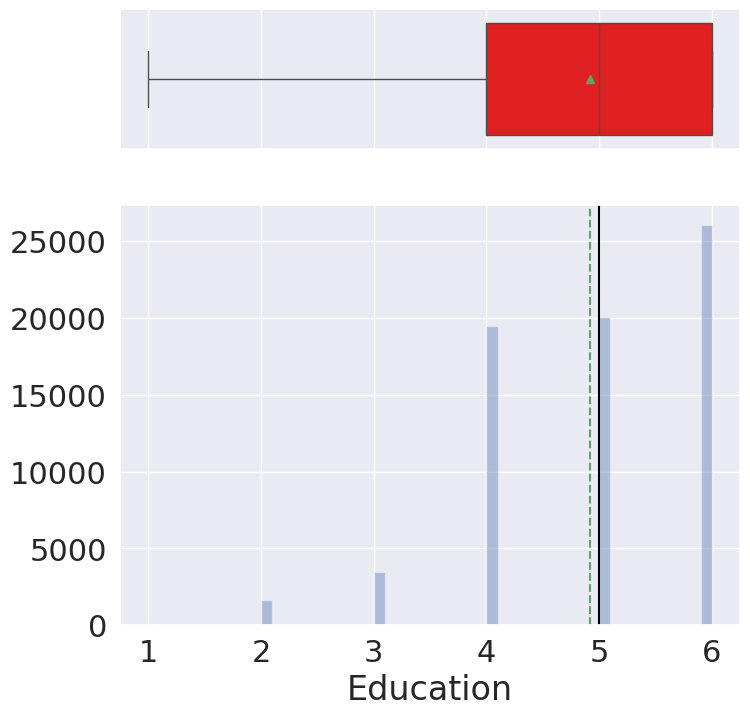

<Figure size 2000x1000 with 0 Axes>

In [29]:
histogram_boxplot(df.Education)

### **Observation:**
* The most frequent education level is '3', followed by '2' and then '4'. There are far fewer people in the other education categories.
* The distribution is right-skewed, meaning there are more people with lower levels of education than higher levels.
* There is a small number of people in the '0' and '7' categories. This could be due to errors in the data or it could be that these categories represent very few people in the real world population.

In [30]:
df.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

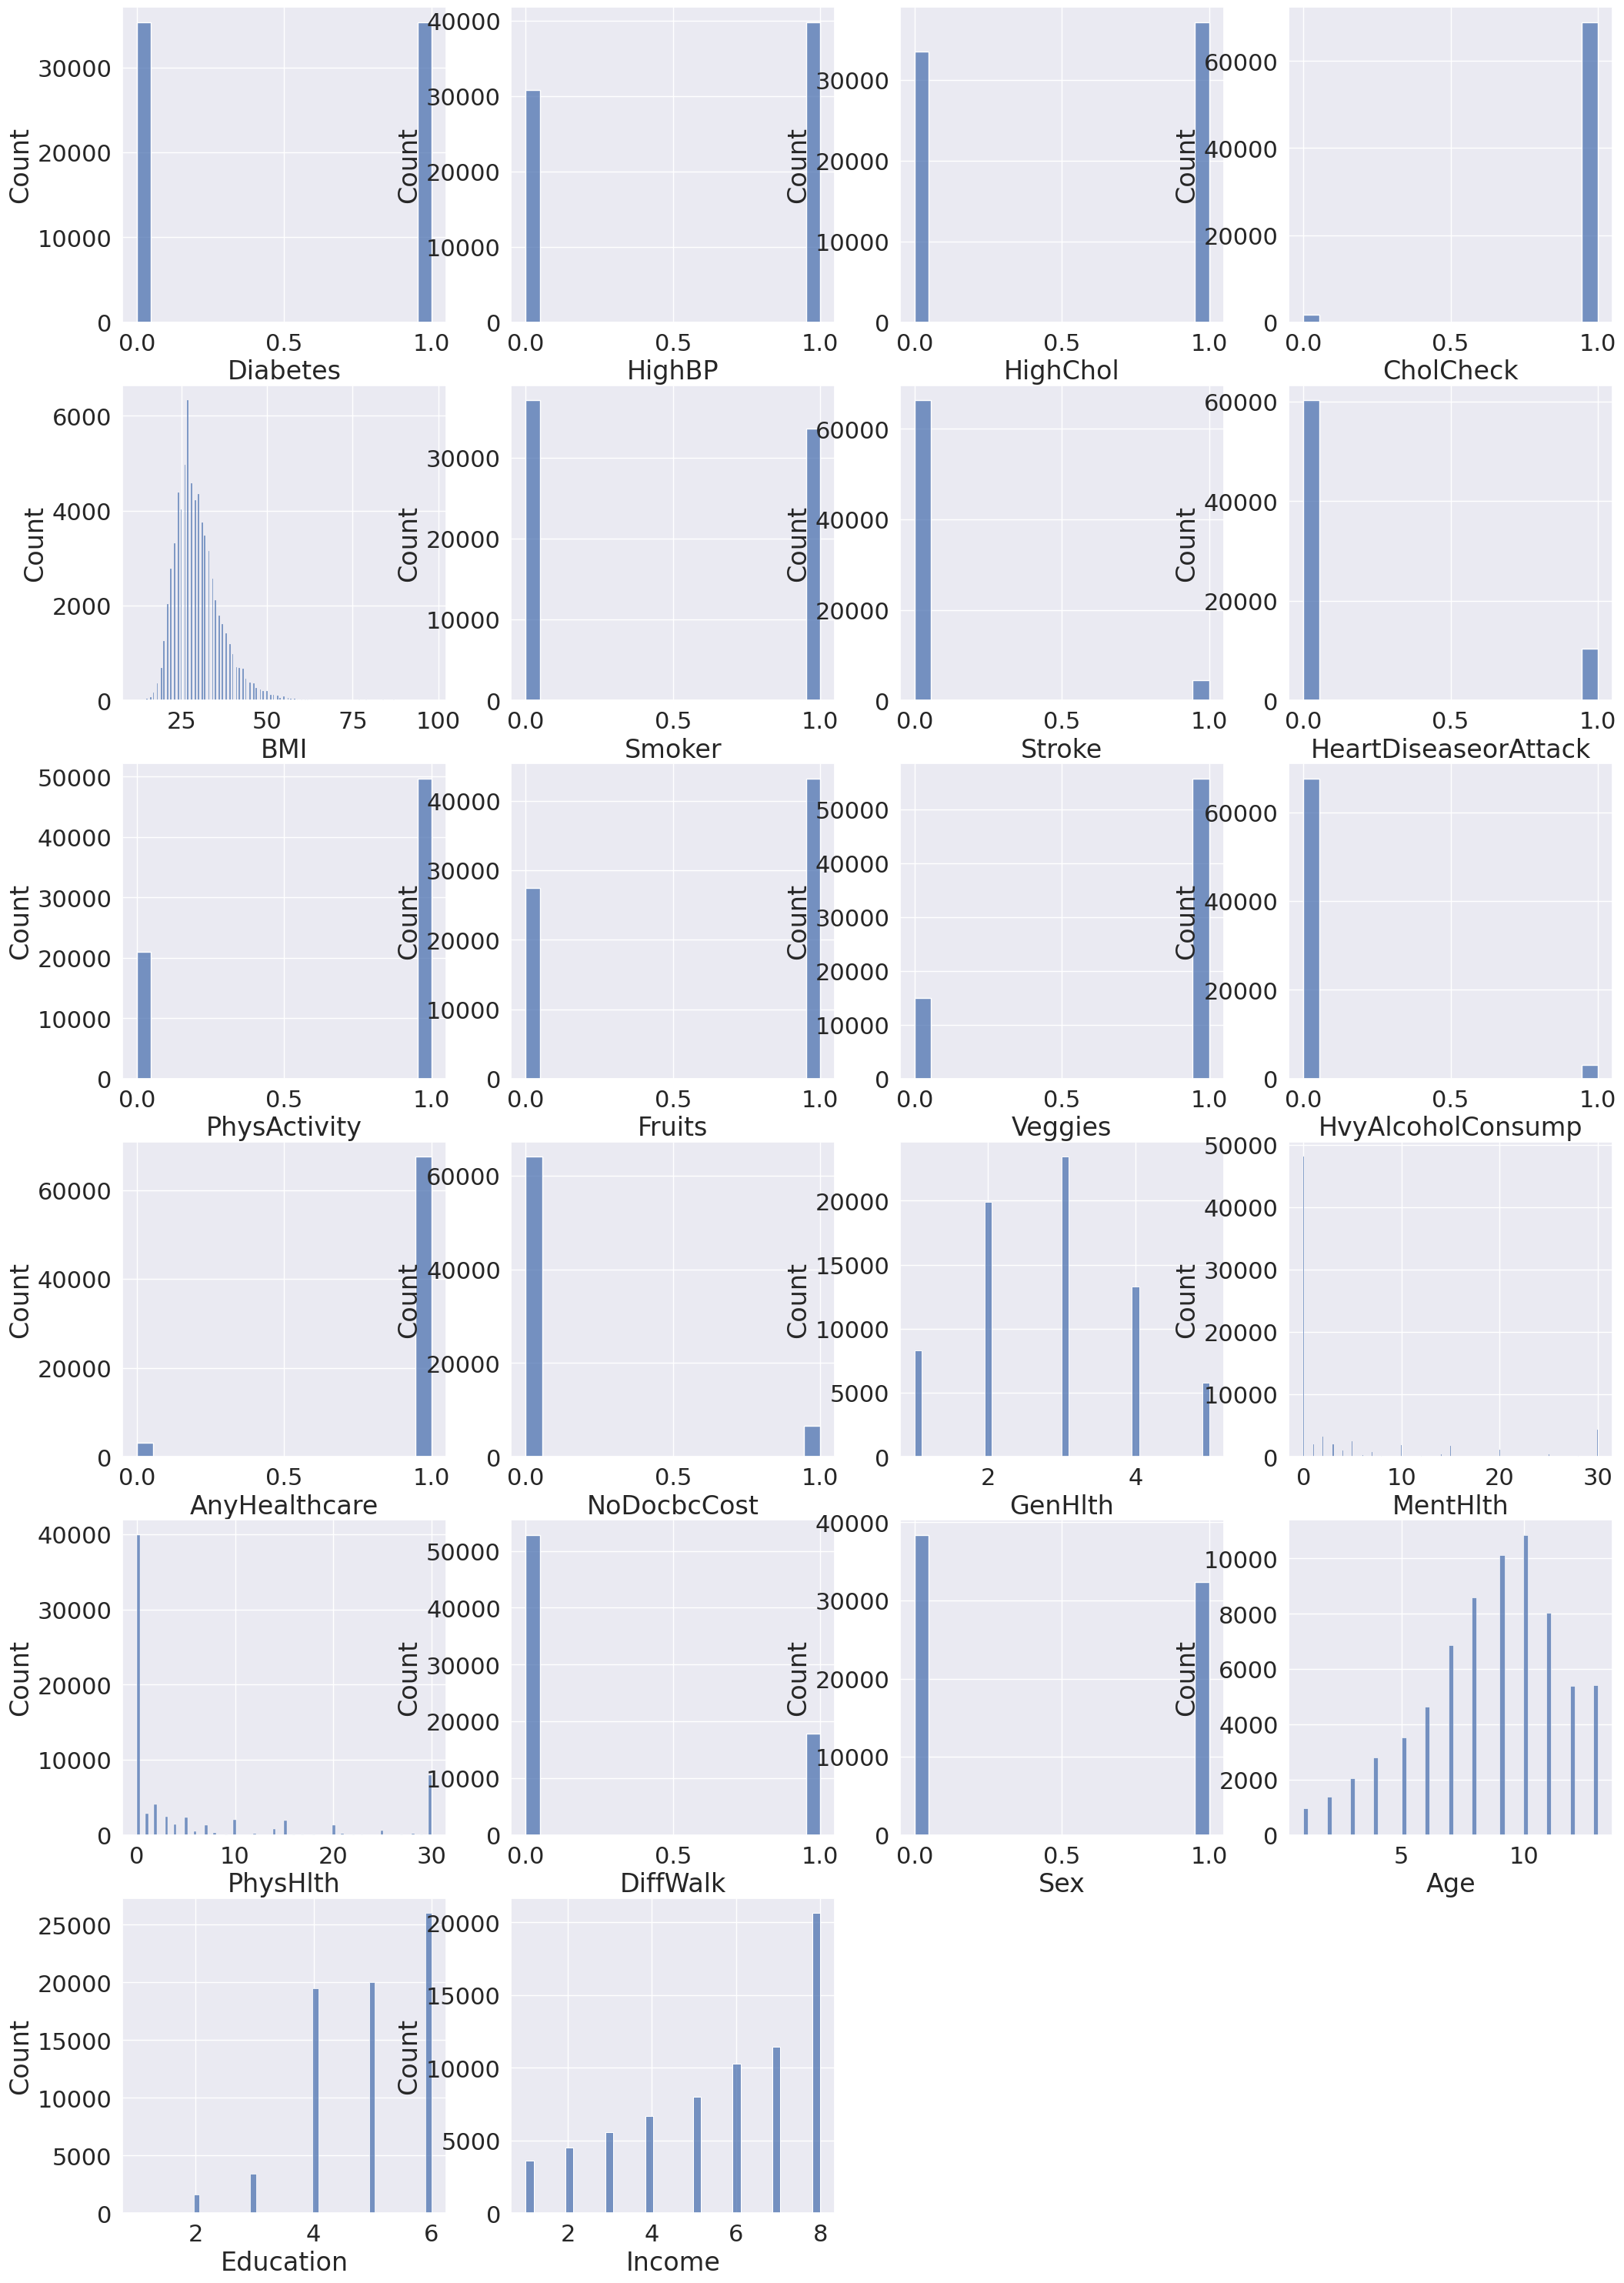

In [31]:
plt.figure(figsize=(25,50))
for i in range (0 , df.shape[1]):
    plt.subplot(8,4,i+1)
    sns.histplot(x=df.iloc[:,i],palette=['#EA906C'])
    # plt.title(df.columns[i])

### **Observation**
Observations:
* High blood pressure (HighBP), high blood cholesterol (HighChol), Smoker, and Sex are relatively evenly distributed. Higher amount of respondents have never been told by professional to have high blood pressure nor high blood cholesterol. Respondents are mostly smoker and mostly female. But none of these groups have any dominant classes.

* Cholesterol check (CholCheck), Stroke, HeartDiseaseorAttack, heavy drinker (HvyAlcoholConsump), AnyHealthcare, NoDoctorCost, and DiffWalk are features having clear imbalanced results. Except CholCheck and AnyHealthcare, which have dominated positive answer, the rest are having negative dominated answer.

* More positive answers were given in PhyActivity, Fruits, and Veggies that implied more respondents had exercises and consumed fruits and vegetables in frequency that regarded as favourble to reduce health problem.

* General health description by the respondents (GenHlth) indicated that they described their health in better scores, for which 1 is excellent and 5 is poor. Group 1, 2, and 3 were the majority groups.

<Axes: xlabel='Age', ylabel='BMI'>

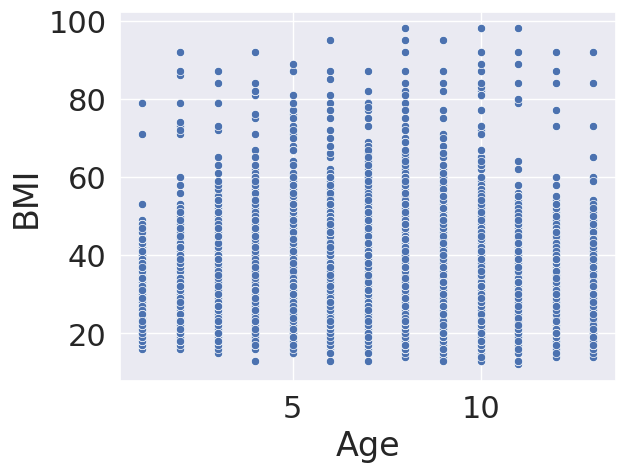

In [32]:
sns.scatterplot(x='Age',y='BMI',data=df)

### **Observation**
The scatterplot shows a moderate positive correlation between age (on the x-axis) and BMI (on the y-axis). This means that as age generally increases, BMI tends to increase as well

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30')])

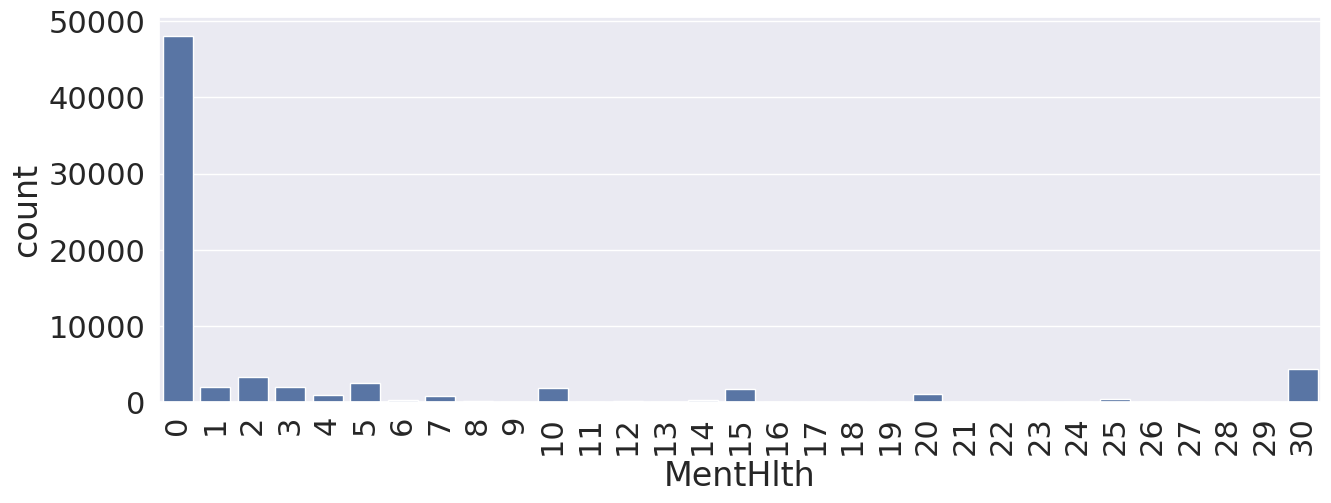

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='MentHlth', ax=ax)
plt.xticks(rotation=90)

In [34]:
df.MentHlth.describe()

count    70692.000000
mean         3.752037
std          8.155627
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: MentHlth, dtype: float64

In [35]:
df.MentHlth.value_counts()

0     48091
30     4320
2      3267
5      2519
1      2051
3      1967
10     1924
15     1767
20     1125
4       981
7       825
25      425
14      353
6       288
8       198
12      130
28       99
21       84
29       53
18       42
16       28
9        28
22       22
17       18
26       17
27       17
13       15
23       13
24       10
11        8
19        7
Name: MentHlth, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30')])

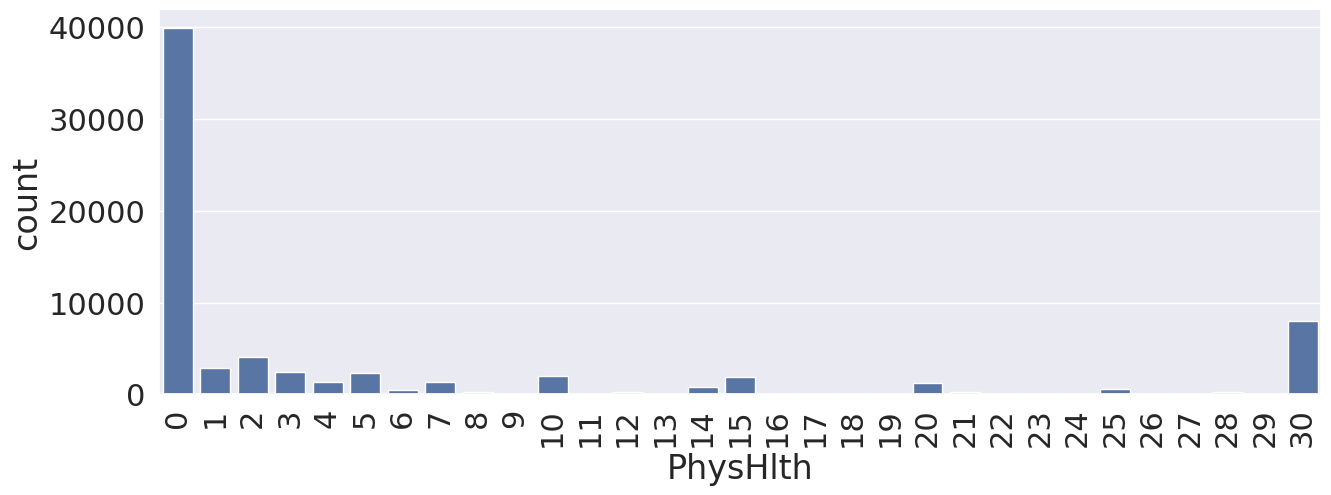

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='PhysHlth', ax=ax)
plt.xticks(rotation=90)

## **Observation**

Here maximum number of patient havig 0 mental health rating and 0 Physical Health rating

In [37]:
df.Sex.value_counts()

0    38386
1    32306
Name: Sex, dtype: int64

## **Observation**
There are 38386 Female and 32306 Male

### Lets have a looks on outlies


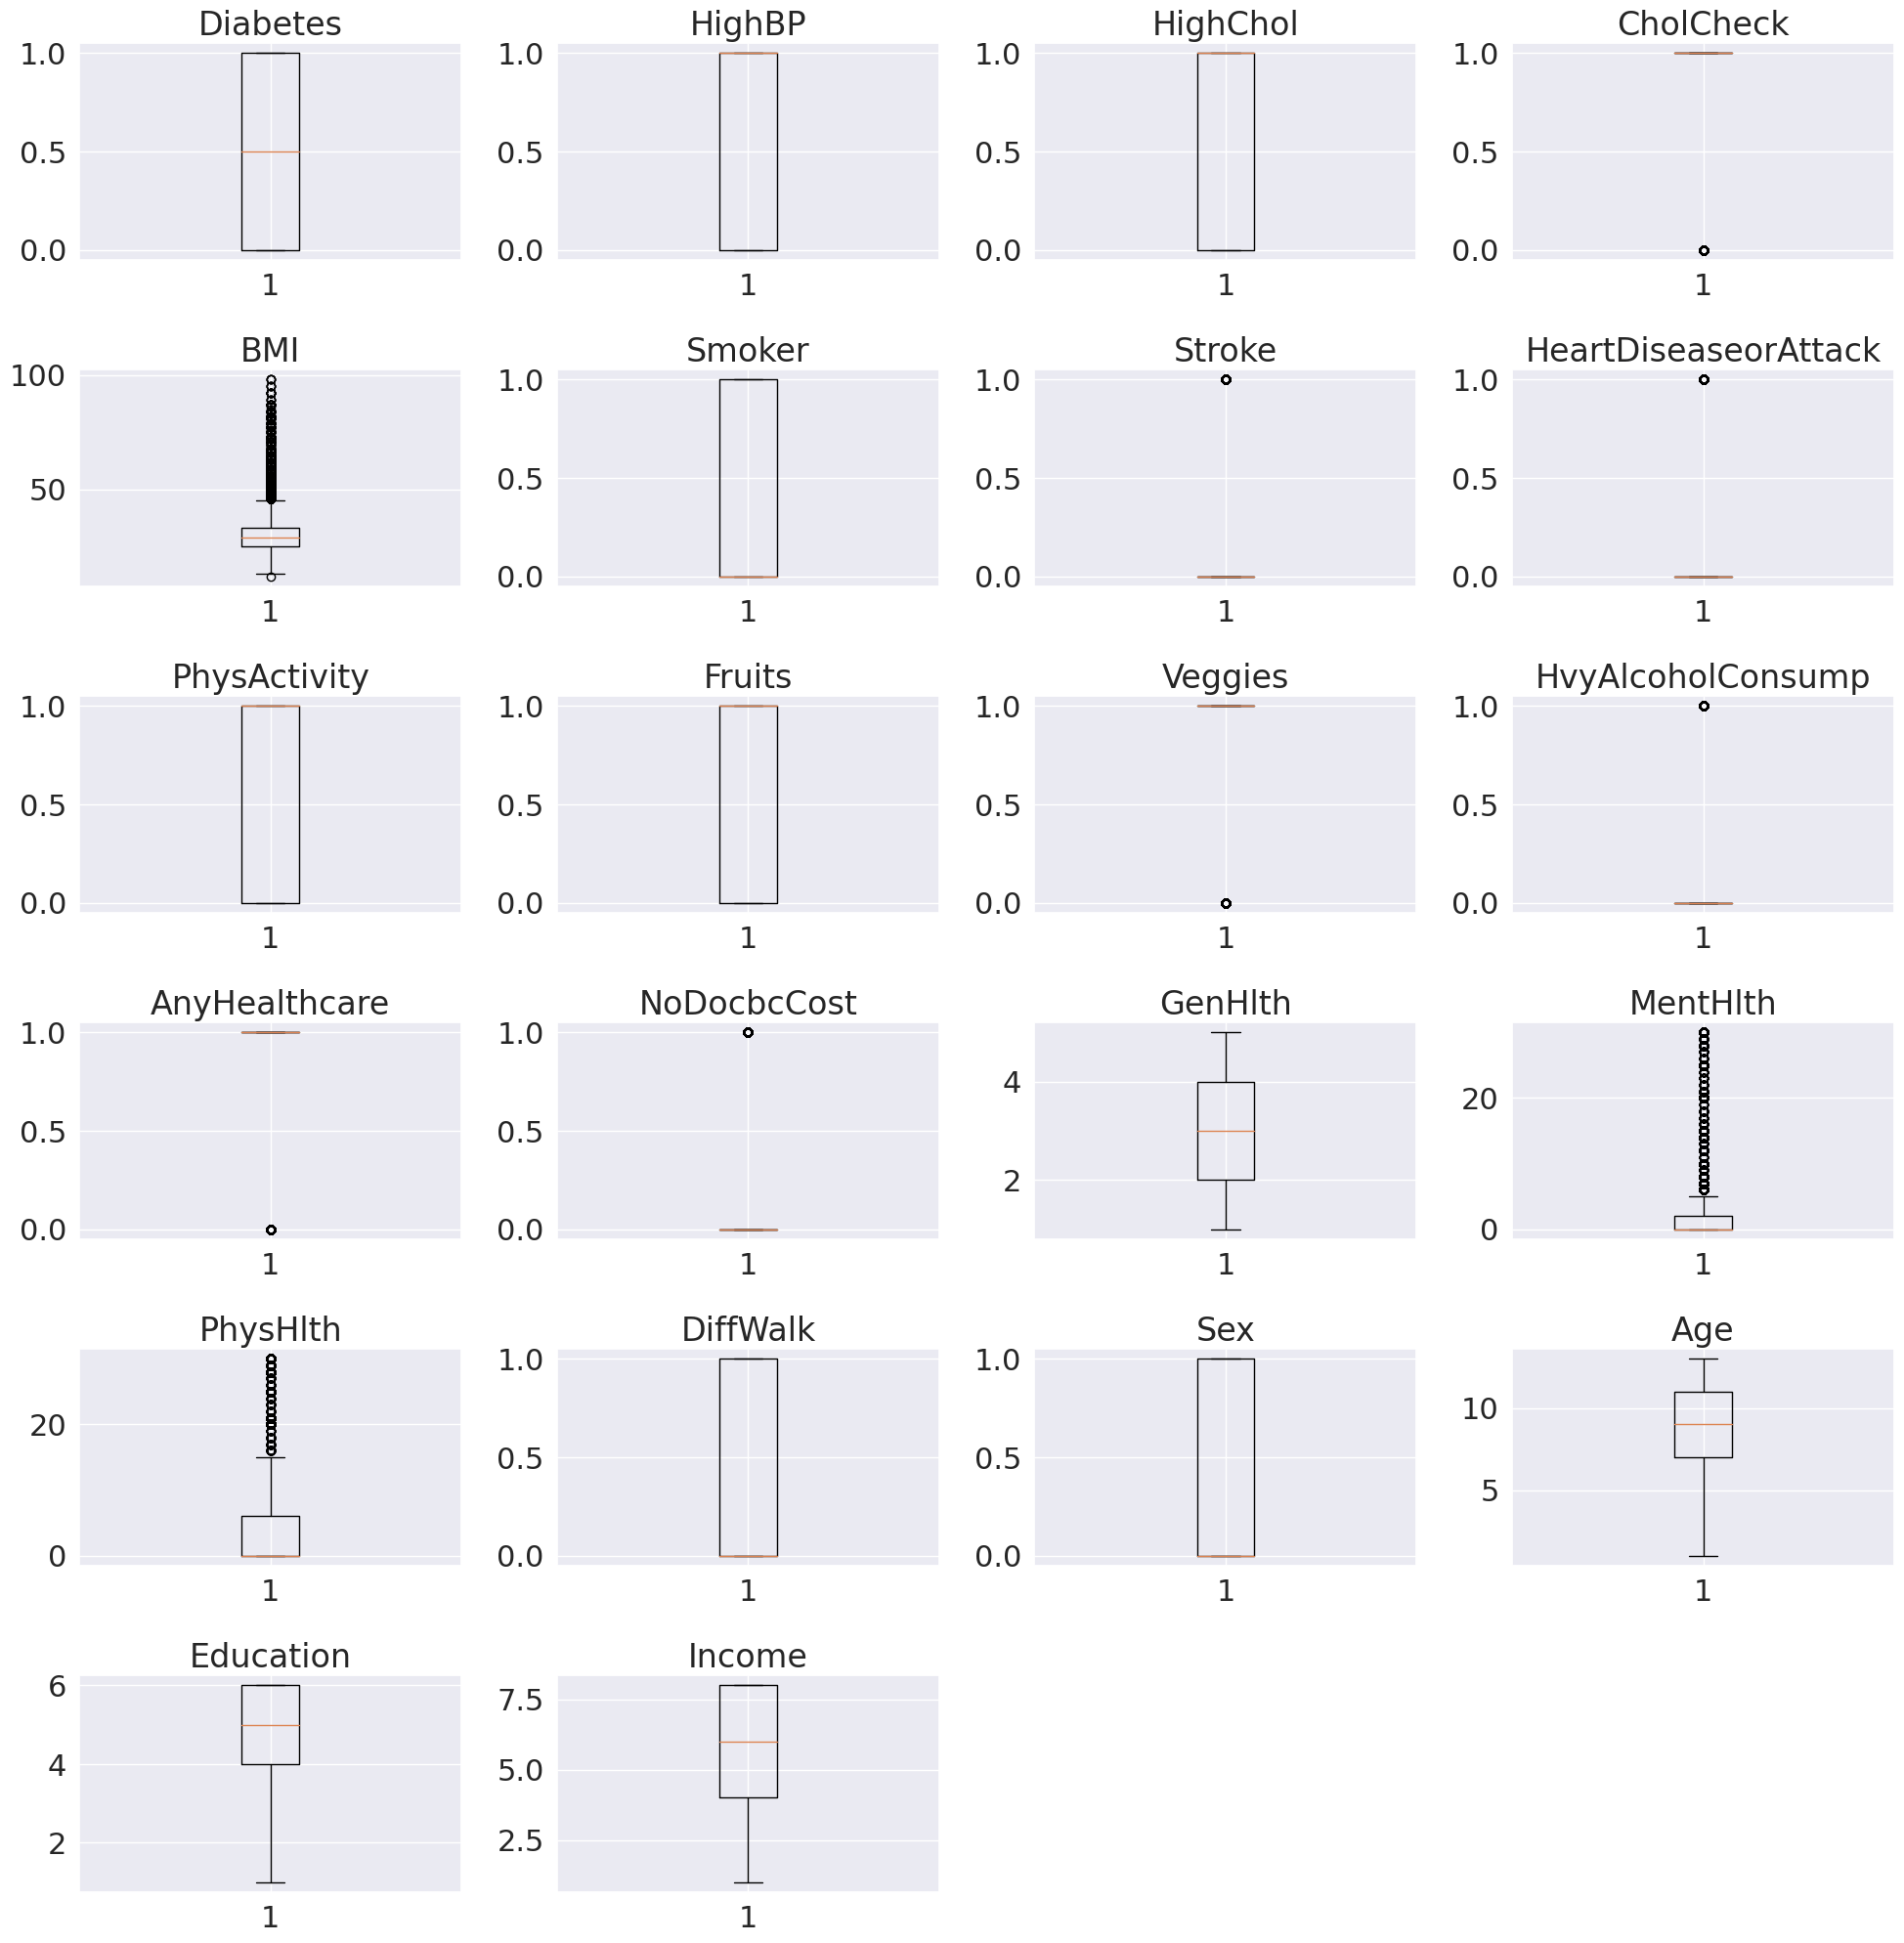

In [38]:
all_col = df.select_dtypes(include=np.number).columns.tolist()

#outlier detection using boxplot
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

## **Observatiom**

* Here all columns looks normal except  MentHlth and PhysHlth.<br>
* MentHelth and PhysHklth has upper outliers. <br>
* We Can normal it during scalling process.

## **Correlation**
It is important to check corellation which shows us how variables are correlated with each others.

In [39]:
corellation = df.corr()
corellation

Diabetes    HighBP  HighChol  CholCheck       BMI  \
Diabetes              1.000000  0.381516  0.289213   0.115382  0.293373   
HighBP                0.381516  1.000000  0.316515   0.103283  0.241019   
HighChol              0.289213  0.316515  1.000000   0.085981  0.131309   
CholCheck             0.115382  0.103283  0.085981   1.000000  0.045648   
BMI                   0.293373  0.241019  0.131309   0.045648  1.000000   
Smoker                0.085999  0.087438  0.093398  -0.004331  0.011551   
Stroke                0.125427  0.129060  0.099786   0.022529  0.022931   
HeartDiseaseorAttack  0.211523  0.210750  0.181187   0.043497  0.060355   
PhysActivity         -0.158666 -0.136102 -0.090453  -0.008249 -0.170936   
Fruits               -0.054077 -0.040852 -0.047384   0.017384 -0.084505   
Veggies              -0.079293 -0.066624 -0.042836   0.000349 -0.056528   
HvyAlcoholConsump    -0.094853 -0.027030 -0.025443  -0.027146 -0.058232   
AnyHealthcare         0.023191  0.035764  0.031532   0.106800 -0.013417   
NoDocbcCost           0.040977  0.026517  0.033199  -0.062669  0.065832   
GenHlth               0.407612  0.320540  0.237778   0.059213  0.267888   
MentHlth              0.087029  0.064294  0.083881  -0.010660  0.104682   
PhysHlth              0.213081  0.173922  0.142610   0.034540  0.161862   
DiffWalk              0.272646  0.234784  0.162043   0.044430  0.246094   
Sex                   0.044413  0.040819  0.017324  -0.007991  0.000827   
Age                   0.278738  0.338132  0.240338   0.101743 -0.038648   
Education            -0.170481 -0.141643 -0.084386  -0.008695 -0.100233   
Income               -0.224449 -0.187657 -0.107777   0.007550 -0.124878   

                        Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  \
Diabetes              0.085999  0.125427              0.211523     -0.158666   
HighBP                0.087438  0.129060              0.210750     -0.136102   
HighChol              0.093398  0.099786              0.181187     -0.090453   
CholCheck            -0.004331  0.022529              0.043497     -0.008249   
BMI                   0.011551  0.022931              0.060355     -0.170936   
Smoker                1.000000  0.064658              0.124418     -0.079823   
Stroke                0.064658  1.000000              0.223394     -0.079985   
HeartDiseaseorAttack  0.124418  0.223394              1.000000     -0.098223   
PhysActivity         -0.079823 -0.079985             -0.098223      1.000000   
Fruits               -0.074811 -0.008996             -0.019436      0.133813   
Veggies              -0.029926 -0.047601             -0.036315      0.149322   
HvyAlcoholConsump     0.077835 -0.023395             -0.037130      0.019111   
AnyHealthcare        -0.012939  0.006484              0.015687      0.027089   
NoDocbcCost           0.035799  0.036198              0.036029     -0.063302   
GenHlth               0.152416  0.189447              0.275868     -0.273548   
MentHlth              0.091257  0.087303              0.075057     -0.130090   
PhysHlth              0.120698  0.164488              0.198416     -0.234500   
DiffWalk              0.119789  0.192266              0.232611     -0.276868   
Sex                   0.112125  0.003822              0.098161      0.051753   
Age                   0.105424  0.123879              0.221878     -0.100753   
Education            -0.140966 -0.073926             -0.096559      0.190271   
Income               -0.104725 -0.136577             -0.146748      0.196551   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
Diabetes             -0.054077  ...       0.023191     0.040977  0.407612   
HighBP               -0.040852  ...       0.035764     0.026517  0.320540   
HighChol             -0.047384  ...       0.031532     0.033199  0.237778   
CholCheck             0.017384  ...       0.106800    -0.062669  0.059213   
BMI                  -0.084505  ...      -0.013417     0.065832  0.267

<Axes: >

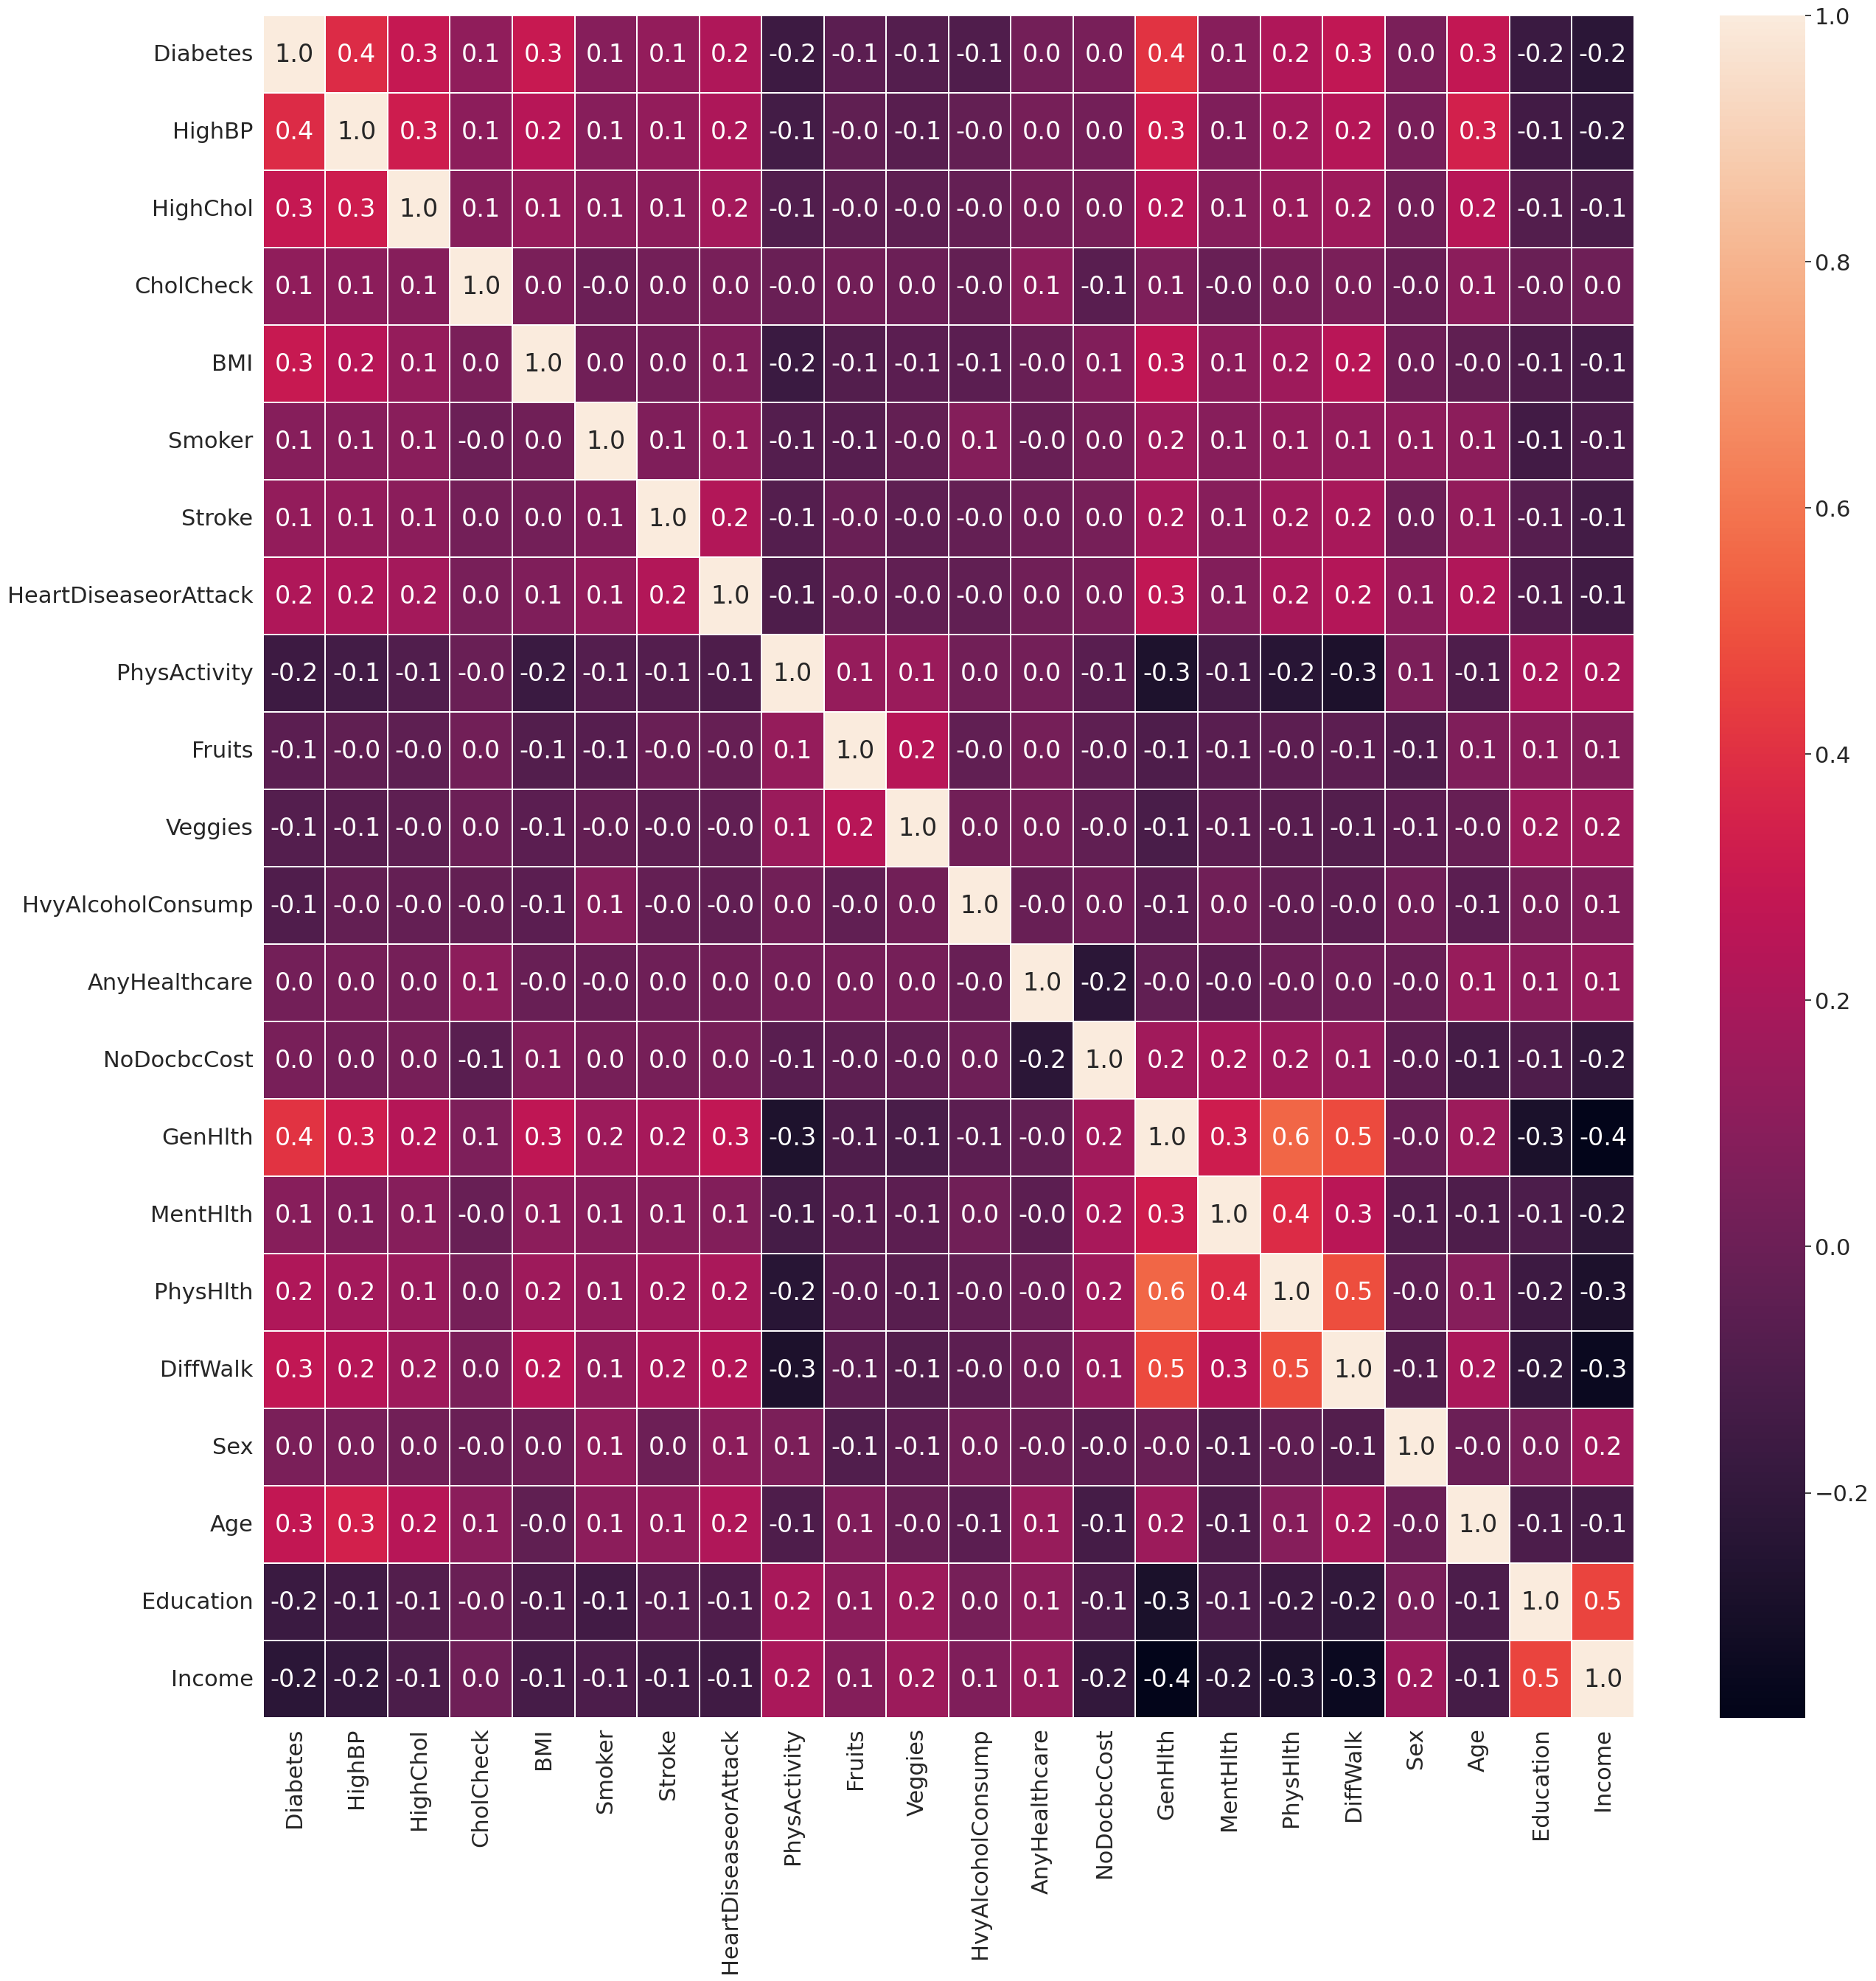

In [40]:
#correlation map
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '1.0001f',ax=ax)


Here we saw the correlation of all columns

In [41]:
df.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [42]:
df.drop(['NoDocbcCost','AnyHealthcare'],axis=1,inplace=True)

In [43]:
df.Fruits.value_counts()

1    43249
0    27443
Name: Fruits, dtype: int64

# **Data Preprocessing**

<Axes: xlabel='BMI', ylabel='Density'>

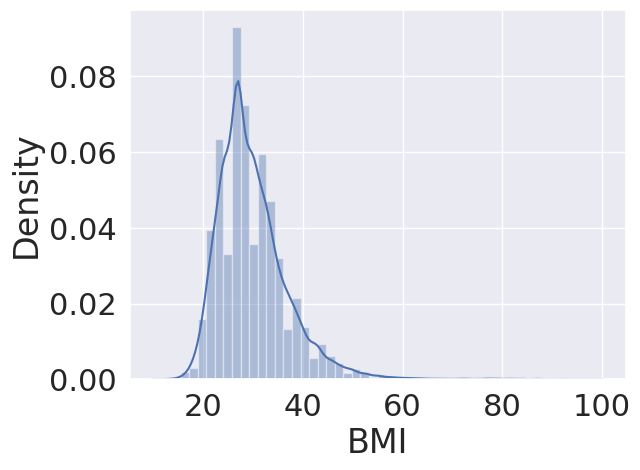

In [44]:
sns.distplot(df.BMI)

In [45]:
# Lets normalise BMI

df['BMI'] = np.log(df.BMI)

<Axes: xlabel='BMI', ylabel='Density'>

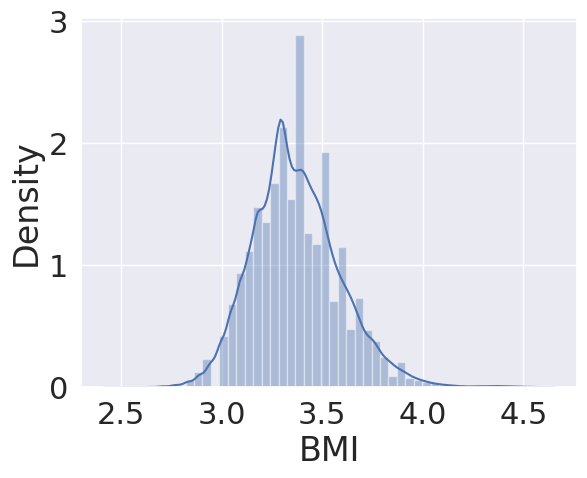

In [46]:
sns.distplot(df.BMI)

<Axes: xlabel='MentHlth', ylabel='Density'>

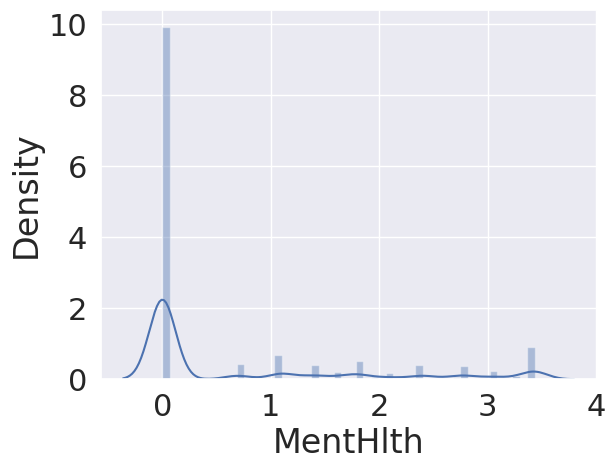

In [47]:
df['MentHlth'] = np.log1p(df.MentHlth)
sns.distplot(df.MentHlth)

Now it seens Normal

<Axes: xlabel='PhysHlth', ylabel='Density'>

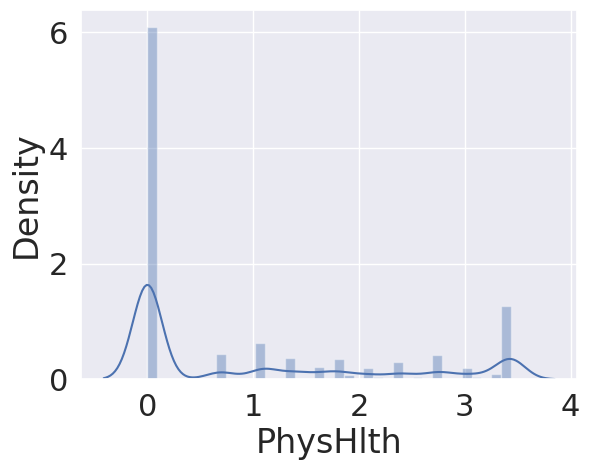

In [48]:
df['PhysHlth'] = np.log1p(df.PhysHlth)
sns.distplot(df.PhysHlth)

### **Defining X (independant) variable and y (target) variable**

In [49]:
df

Diabetes  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0             0       1         0          1  3.258097       0       0   
1             0       1         1          1  3.258097       1       1   
2             0       0         0          1  3.258097       0       0   
3             0       1         1          1  3.332205       1       0   
4             0       0         0          1  3.367296       1       0   
...         ...     ...       ...        ...       ...     ...     ...   
70687         1       0         1          1  3.610918       0       0   
70688         1       0         1          1  3.367296       1       0   
70689         1       1         1          1  3.218876       0       0   
70690         1       1         1          1  2.890372       0       0   
70691         1       1         1          1  3.218876       0       0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                         0             1       0        1                  0   
1                         0             0       1        0                  0   
2                         0             1       1        1                  0   
3                         0             1       1        1                  0   
4                         0             1       1        1                  0   
...                     ...           ...     ...      ...                ...   
70687                     0             0       0        1                  0   
70688                     1             0       1        1                  0   
70689                     1             0       1        0                  0   
70690                     0             0       0        0                  0   
70691                     1             1       1        0                  0   

       GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0            3  1.791759  3.433987         0    1    4          6       8  
1            3  0.000000  0.000000         0    1   12          6       8  
2            1  0.000000  2.397895         0    1   13          6       8  
3            3  0.000000  1.386294         0    1   11          6       8  
4            2  0.000000  0.000000         0    0    8          5       8  
...        ...       ...       ...       ...  ...  ...        ...     ...  
70687        4  0.000000  0.000000         0    0    6          4       1  
70688        2  0.000000  0.000000         1    1   10          3       6  
70689        5  2.772589  0.000000         1    0   13          6       4  
70690        4  0.000000  0.000000         1    0   11          2       4  
70691        2  0.000000  0.000000         0    0    9          6       2  

[70692 rows x 20 columns]

In [50]:
X = df.drop('Diabetes',axis=1)
y = df[['Diabetes']]

In [51]:
X.head()

HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0       1         0          1  3.258097       0       0   
1       1         1          1  3.258097       1       1   
2       0         0          1  3.258097       0       0   
3       1         1          1  3.332205       1       0   
4       0         0          1  3.367296       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                     0             1       0        1                  0   
1                     0             0       1        0                  0   
2                     0             1       1        1                  0   
3                     0             1       1        1                  0   
4                     0             1       1        1                  0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        3  1.791759  3.433987         0    1    4          6       8  
1        3  0.000000  0.000000         0    1   12          6       8  
2        1  0.000000  2.397895         0    1   13          6       8  
3        3  0.000000  1.386294         0    1   11          6       8  
4        2  0.000000  0.000000         0    0    8          5       8

In [52]:
y.head()

Diabetes
0         0
1         0
2         0
3         0
4         0

# **Spllting Data**


### **Data Leakage**
Data Leakage is the scenario where the Machine Learning Model is already aware of some part of test data after training. <br> This causes the problem of overfitting.<br>
Solution is Splitting the data in Train-Validation-Test Formate where Data is splitting twice.

## Train-test split twice

* First split - splitting the orignal dataset.
* Training set for experiments in further section
* Testing set for final model performance
---
* Second split - Splitting the training data
* Training set for further experimet
* Testing set(validation set) for the evaluation of model during experiment(Not the final model)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# First Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Check shape of split
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (49484, 19)
X_test (21208, 19)
y_train (49484, 1)
y_test (21208, 1)


In [55]:
# Second Split

X_train_train,X_train_valid,y_train_train,y_train_valid = train_test_split(X_train,y_train,test_size=0.3,random_state=1)

# Check shape of split
print('X_train_train',X_train_train.shape)
print('X_train_valid',X_train_valid.shape)
print('y_train_train',y_train_train.shape)
print('y_train_valid',y_train_valid.shape)

X_train_train (34638, 19)
X_train_valid (14846, 19)
y_train_train (34638, 1)
y_train_valid (14846, 1)


# **Building Model**

In [56]:
# Functions to calculate the performance of model

def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    Creates a confusion matrix to visualize the performance of a classification model.

    Args:
        model: The trained classifier model.
        y_actual: The ground truth labels.
        labels: The list of labels to use in the confusion matrix (optional).

    Returns:
        A pandas DataFrame representing the confusion matrix.
    """

    y_predict = model.predict(X_train_valid)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"], columns=["Predicted No", "Predicted Yes"])

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')


In [57]:
# Function to cal recall score

def get_recall_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(X_train_train)  # Predict on training set
  pred_test = model.predict(X_train_valid)  # Predict on test set

  print("Recall on training set: ", metrics.recall_score(y_train_train, pred_train))
  print("Recall on test set: ", metrics.recall_score(y_train_valid, pred_test))


# **Lets start from Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
# Train our model
logreg.fit(X_train_train,y_train_train)

LogisticRegression()

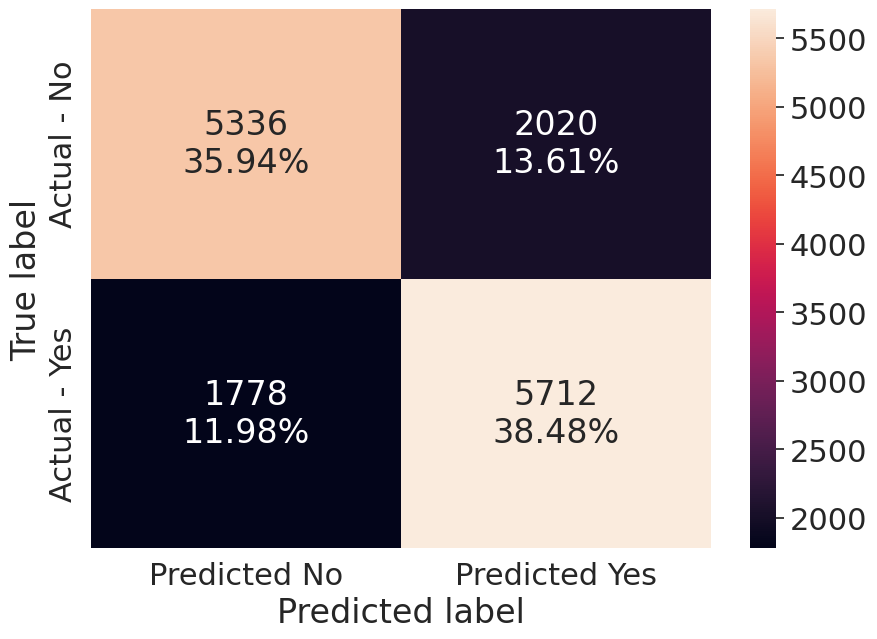

In [60]:
# Checking Confusion matrix
make_confusion_matrix(logreg,y_train_valid)

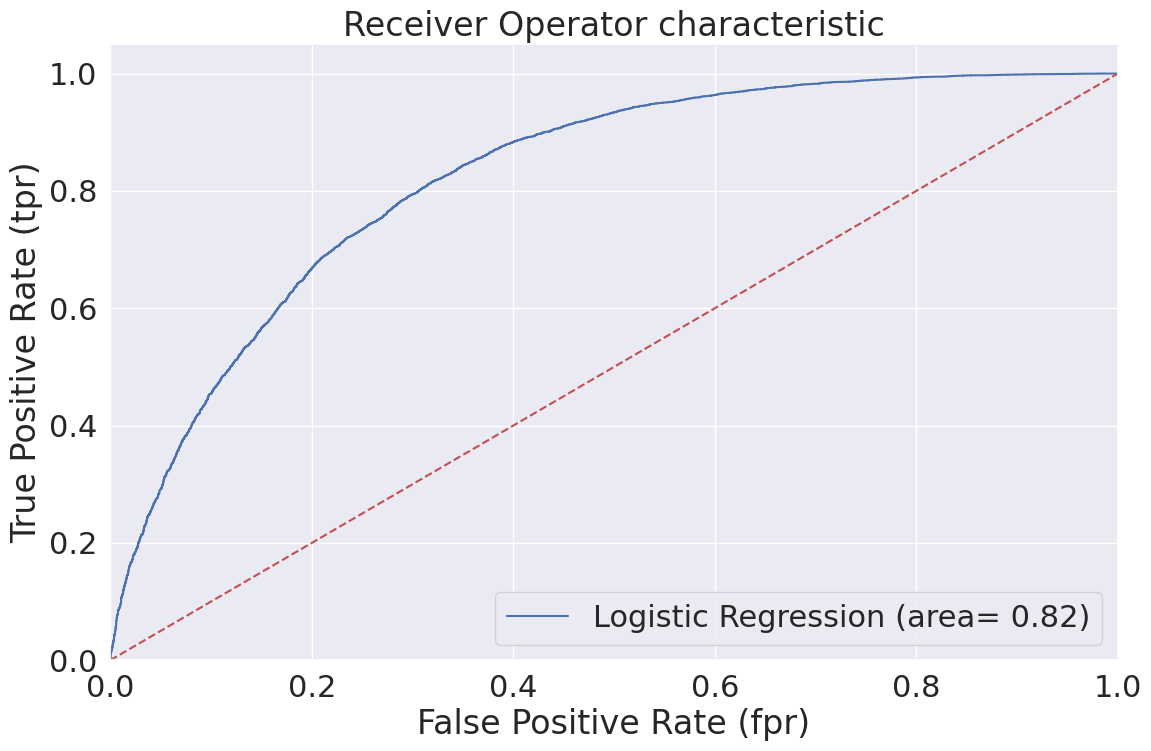

In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(y_train_valid, logreg.predict_proba(X_train_valid)[:,1])
fpr, tpr, thresholds= roc_curve(y_train_valid, logreg.predict_proba(X_train_valid) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [62]:
# Checking Performance of model
get_recall_score(logreg)

Recall on training set:  0.7691730624963933
Recall on test set:  0.7626168224299066


## **Observation:**

* Out of 7356 0s model predict 5336 correct 0s
* Out of 7490 1s model predict 5712 correct 1s
* Model Performes good on both train and train_valid(test) data based on recall score.
* Models AucRoc score is 0.82.



# **Lets check for Decision Tree Classifier**


In [63]:
y_train_valid.value_counts()

Diabetes
1           7490
0           7356
dtype: int64

In [64]:
# Some Important Library required for classification and Performance of model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [65]:
model = DecisionTreeClassifier(random_state=1)

In [66]:
model.fit(X_train_train,y_train_train)

DecisionTreeClassifier(random_state=1)

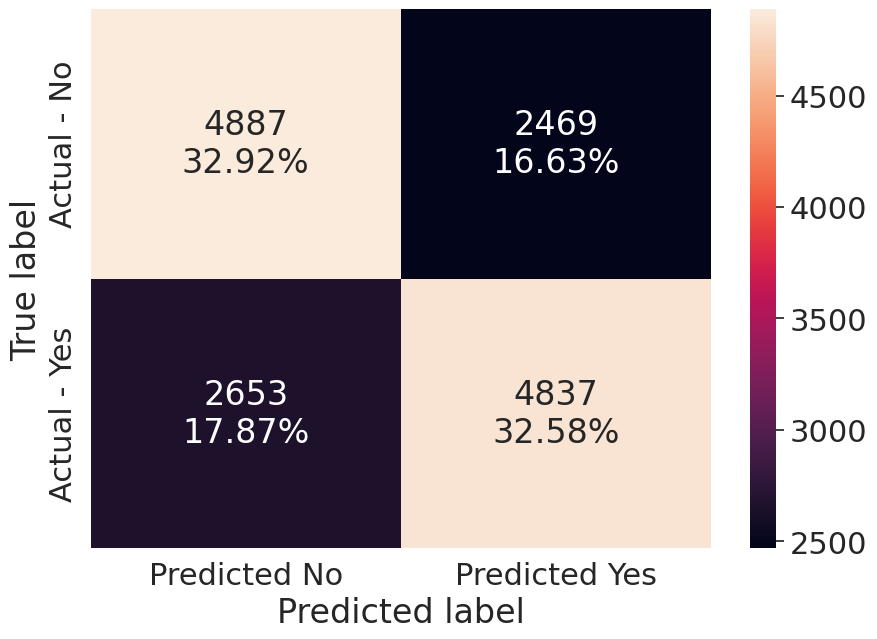

In [67]:
make_confusion_matrix(model,y_train_valid)

In [68]:
get_recall_score(model)

Recall on training set:  0.9933060188123954
Recall on test set:  0.6457943925233645


* Mode is performing to good on train data but poor on valid(test) data
* Model is overfit

### Visualize the tree

In [69]:
feature_names = X.columns

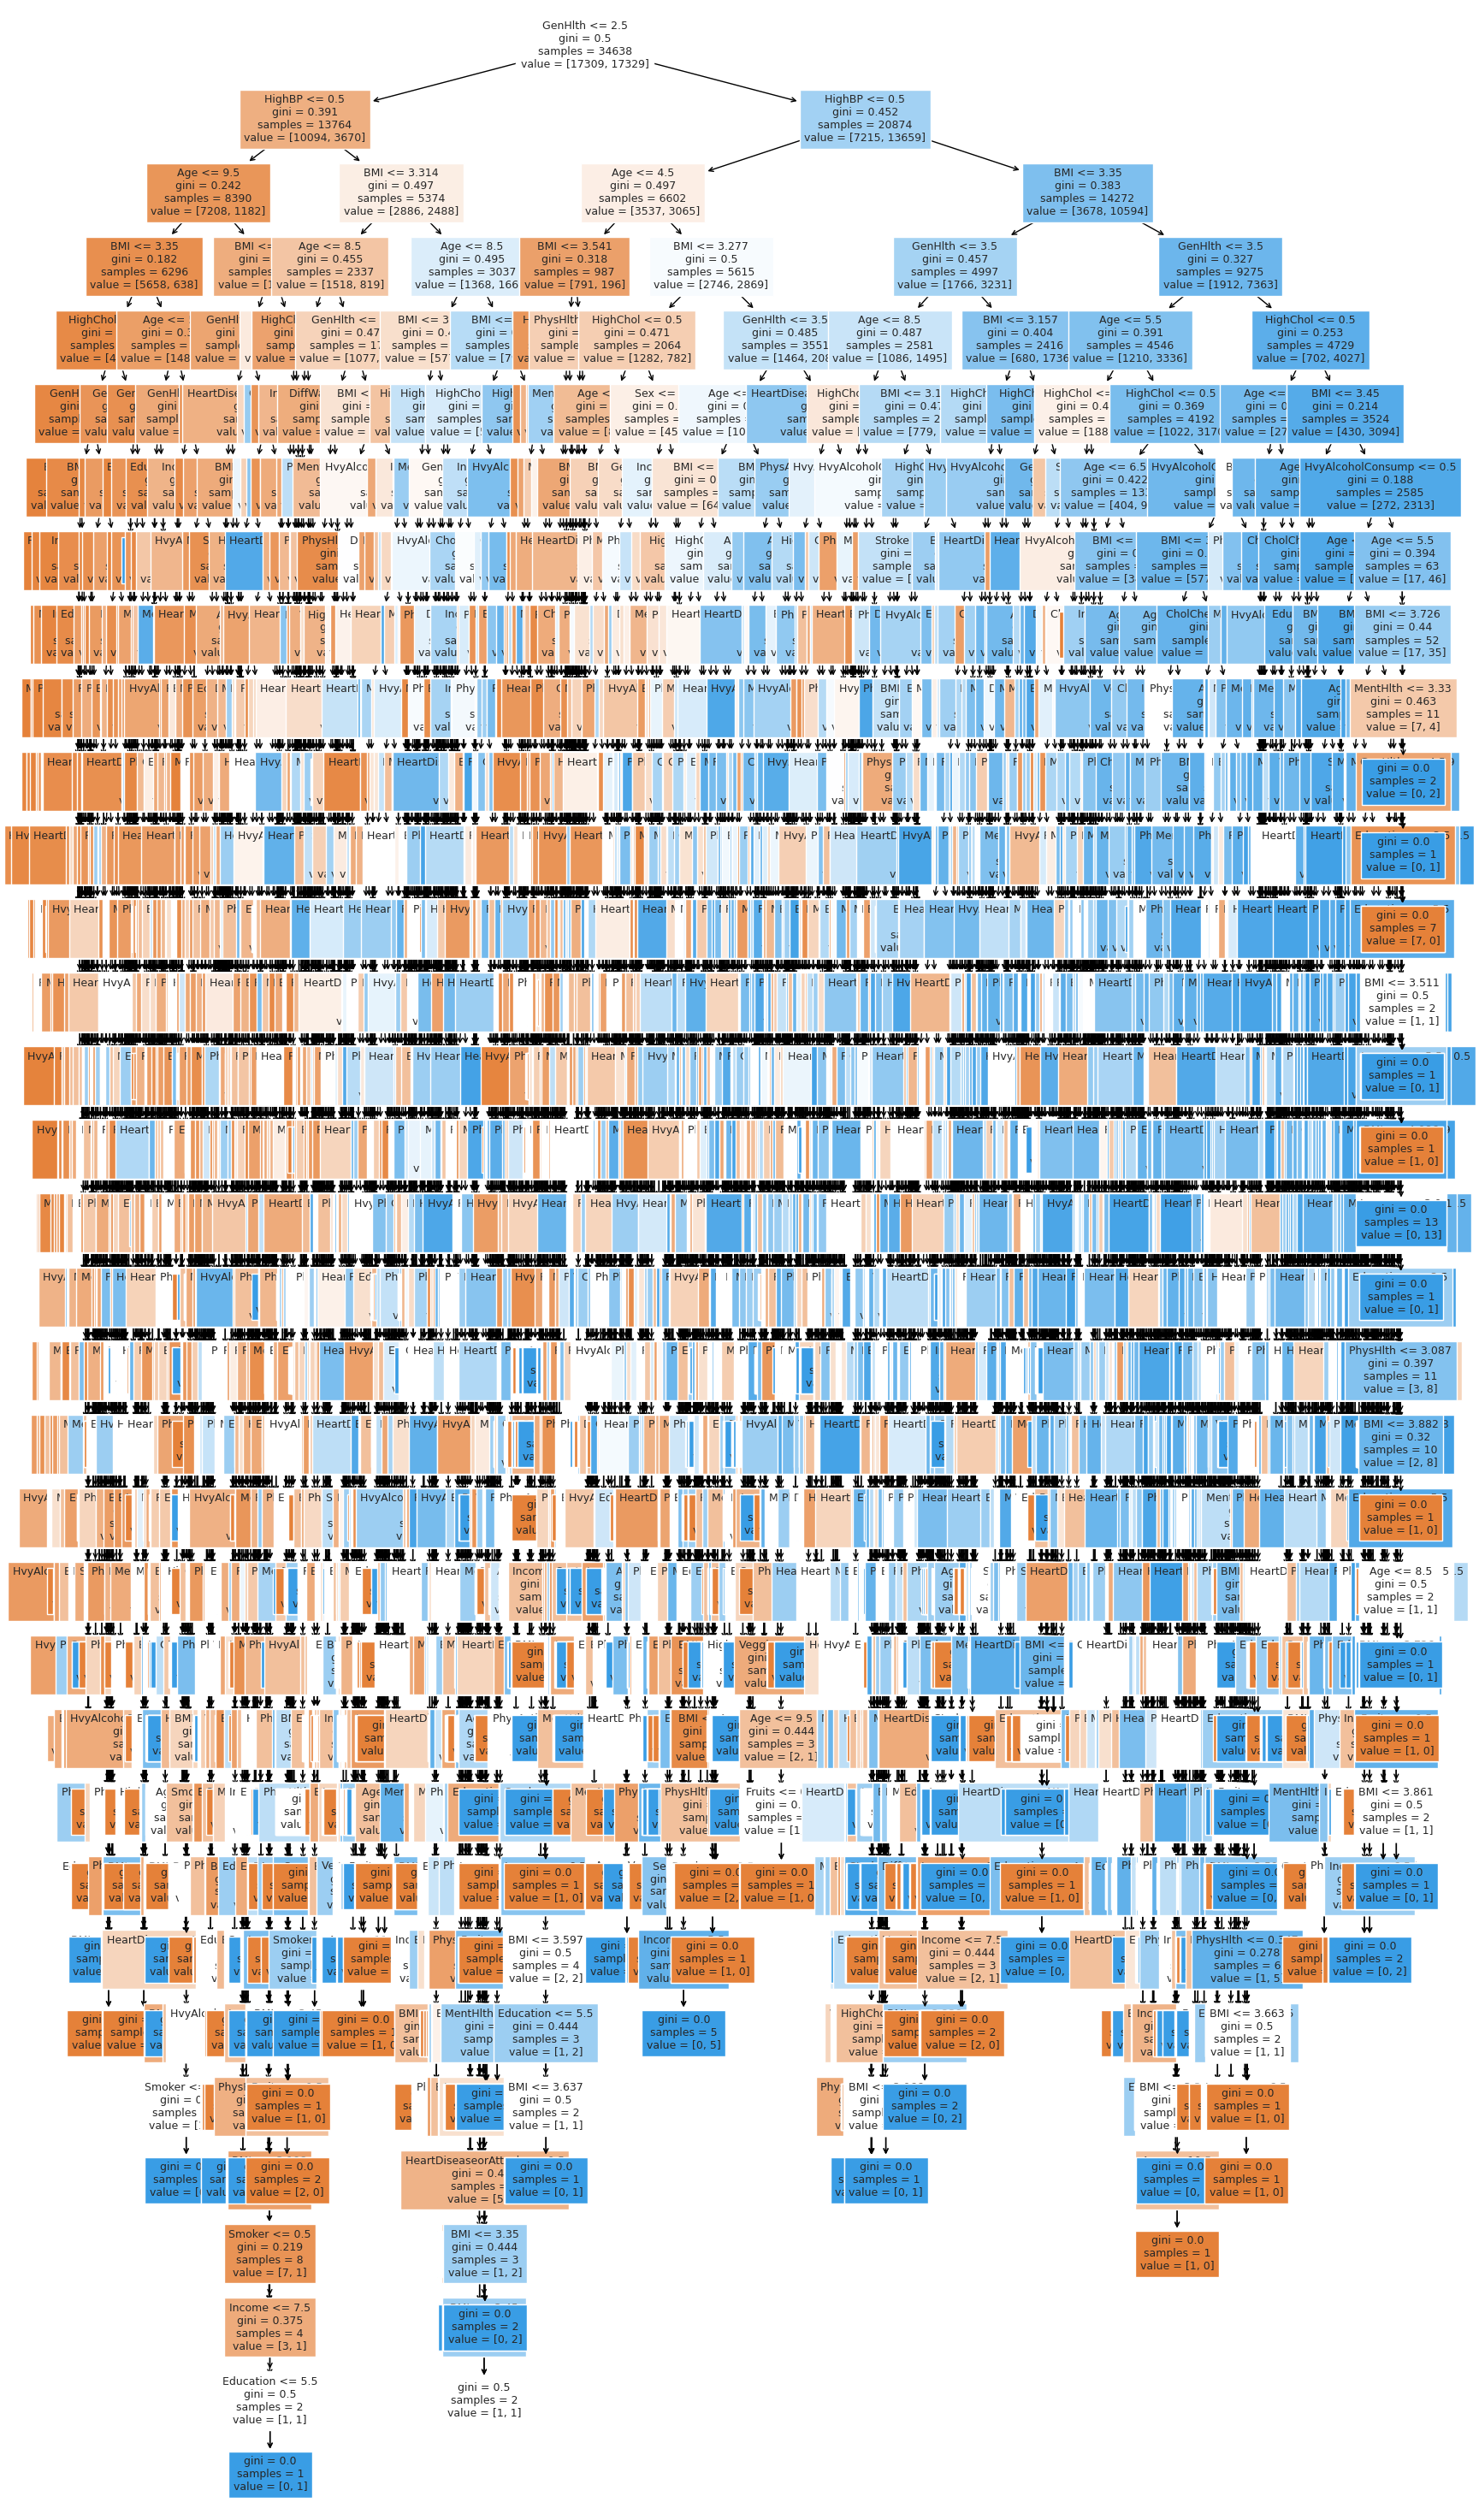

In [70]:
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


## **Pre- Prunning**
Using pre-pruning method for hyper parameter tunning using grid search for better result

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [72]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00001, 0.0001],
    'max_features': ['log2', 'sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the Randomize serch search
grid_obj = RandomizedSearchCV(estimator, parameters, scoring=scorer,n_iter=50, cv=5)
grid_obj = grid_obj.fit(X_train_train, y_train_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.                                 I
estimator.fit(X_train_train, y_train_train)



DecisionTreeClassifier(max_depth=3, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

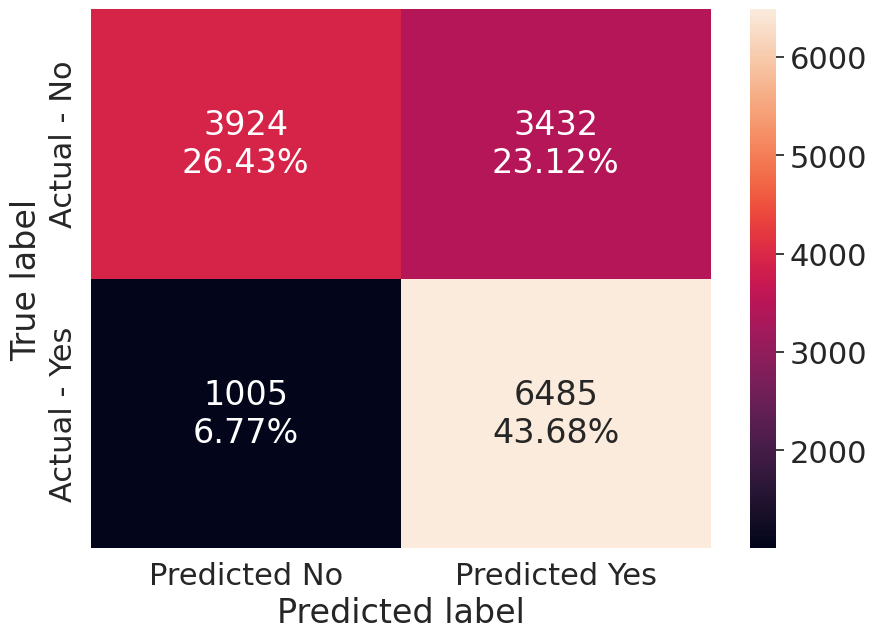

In [73]:
make_confusion_matrix(estimator,y_train_valid)

In [74]:
get_recall_score(estimator)

Recall on training set:  0.8716602227479947
Recall on test set:  0.8658210947930574


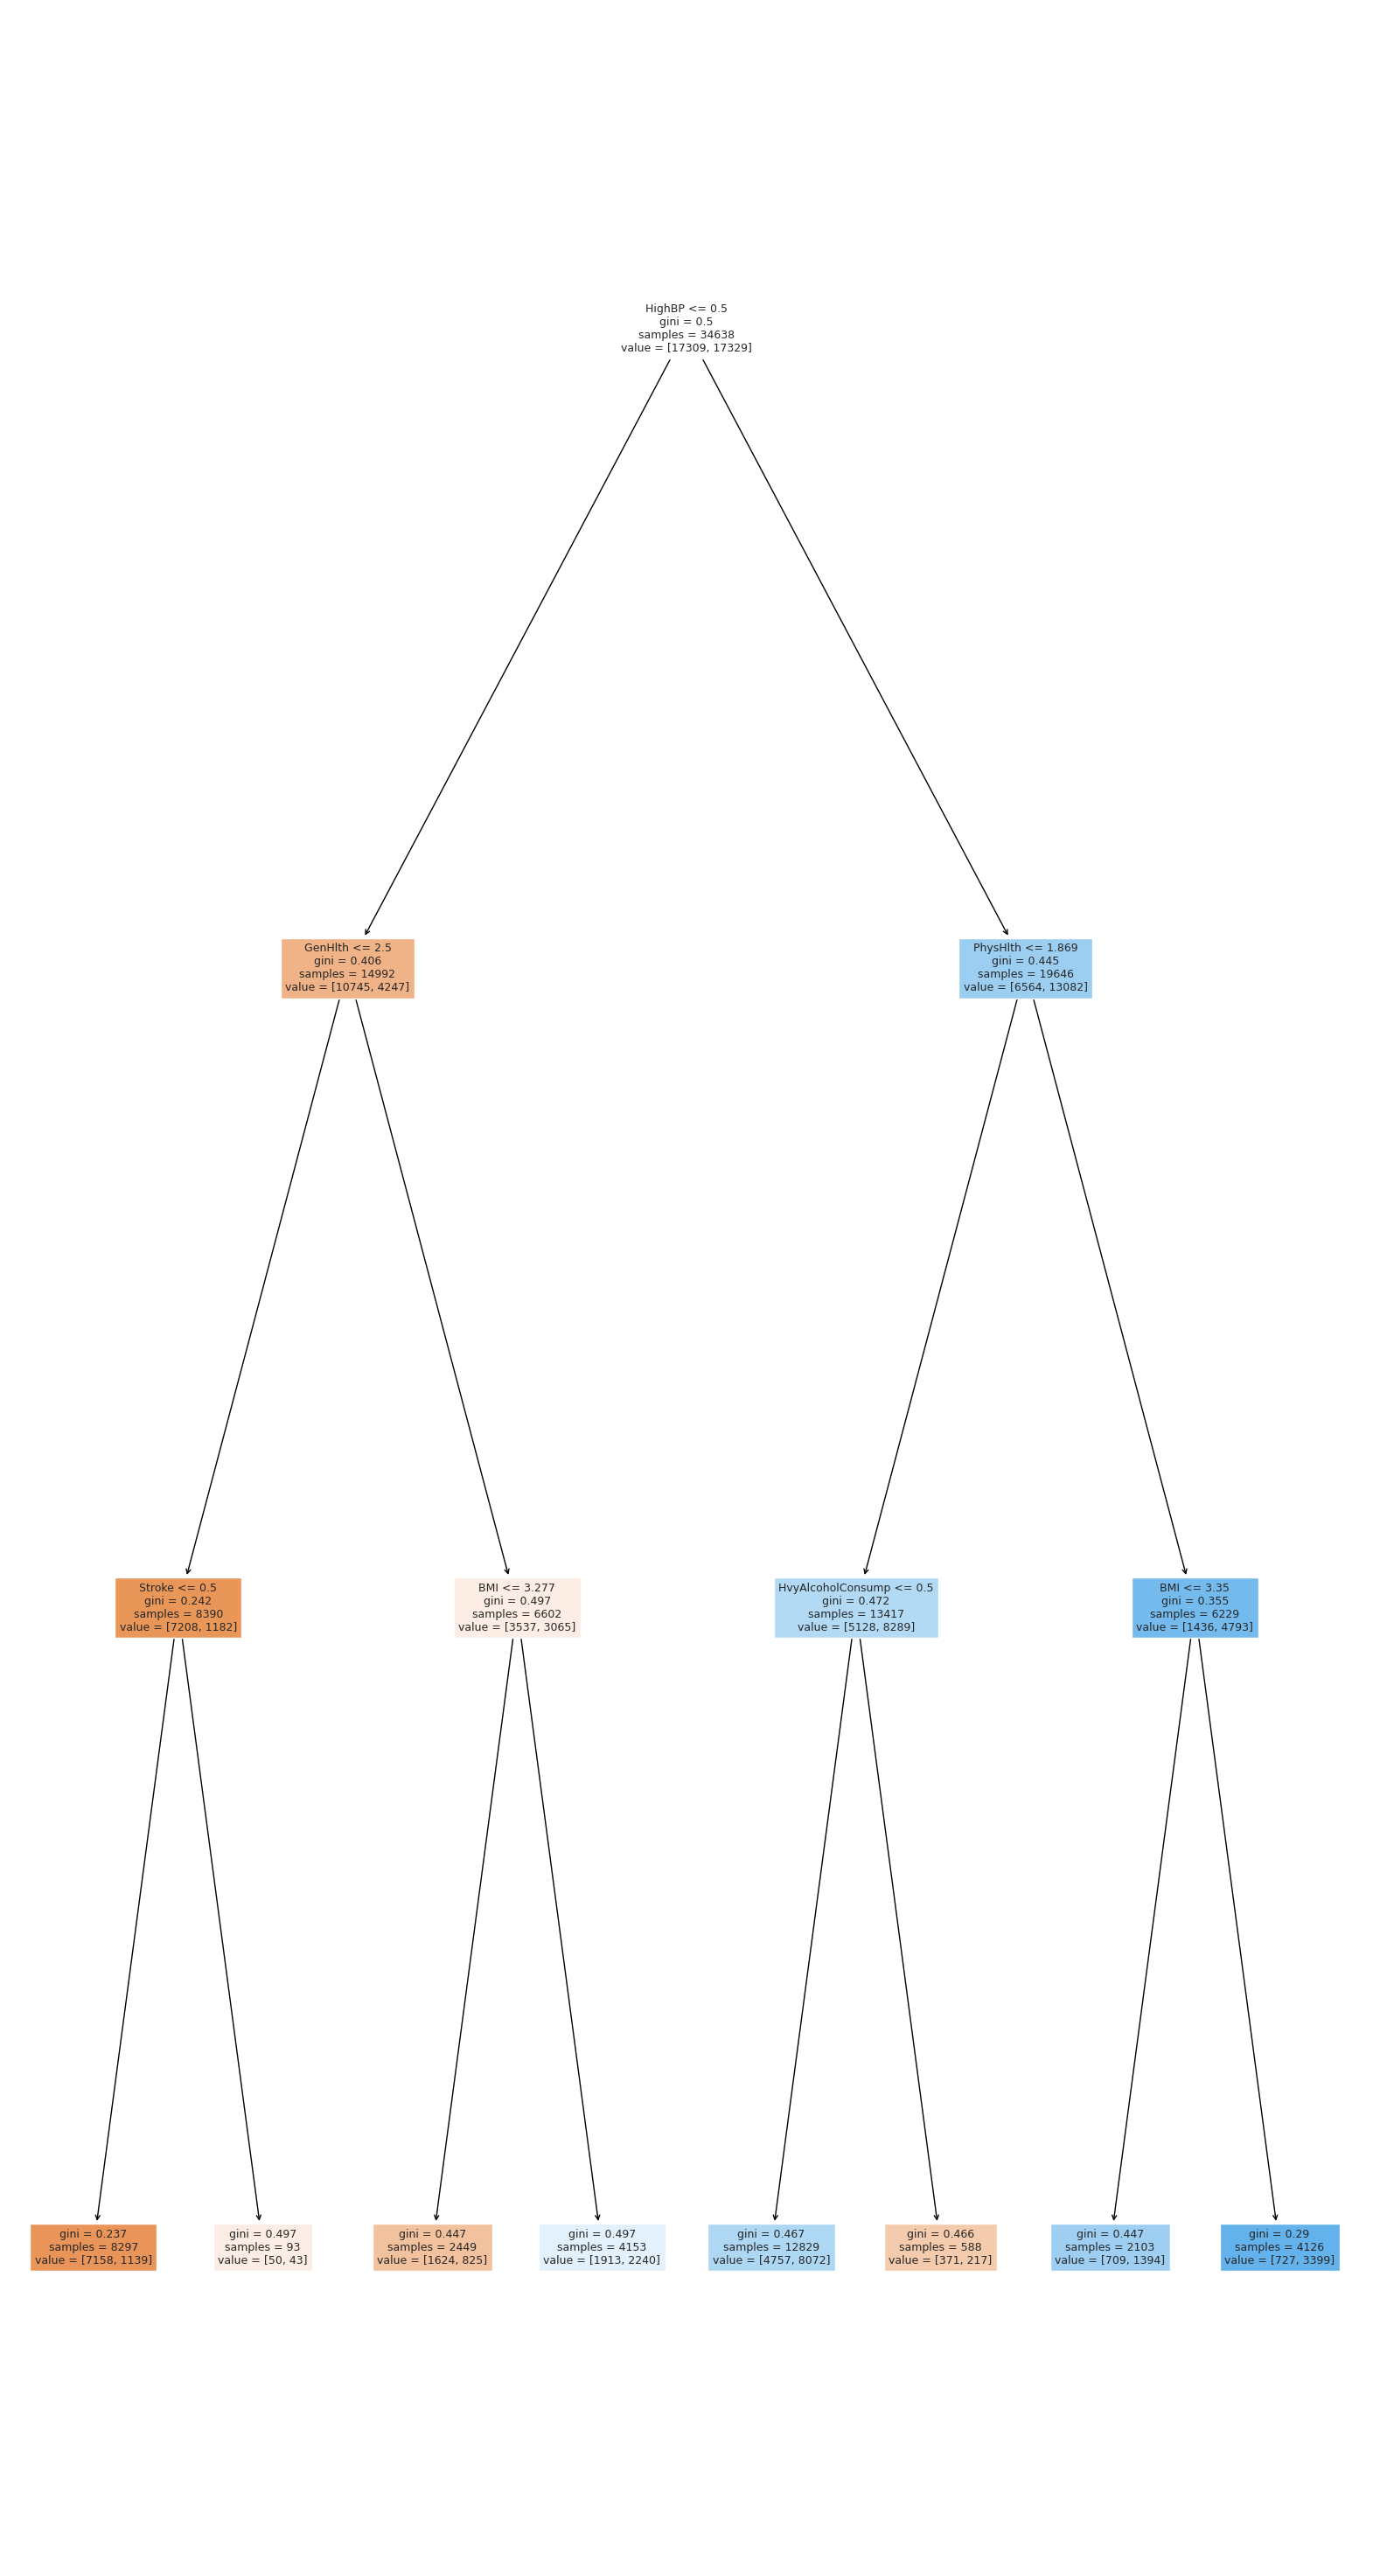

In [75]:
## Visualize the tree
plt.figure(figsize=(20,38))
out = tree.plot_tree(estimator,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()

## **Observation**
* We used RandomSerchCV for finding best hyperparameter of DecisionTreeClassifier
* Here, model perform good on both train and test data
* Recall on training set:  0.8716602227479947
* Recall on test set:  0.8658210947930574

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X_train_train = X_scaler.fit_transform(X_train_train)
X_train_valid = X_scaler.transform(X_train_valid)
X_test =  X_scaler.transform(X_test)

# **Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train_train,y_train_train)

BaggingClassifier(random_state=1)

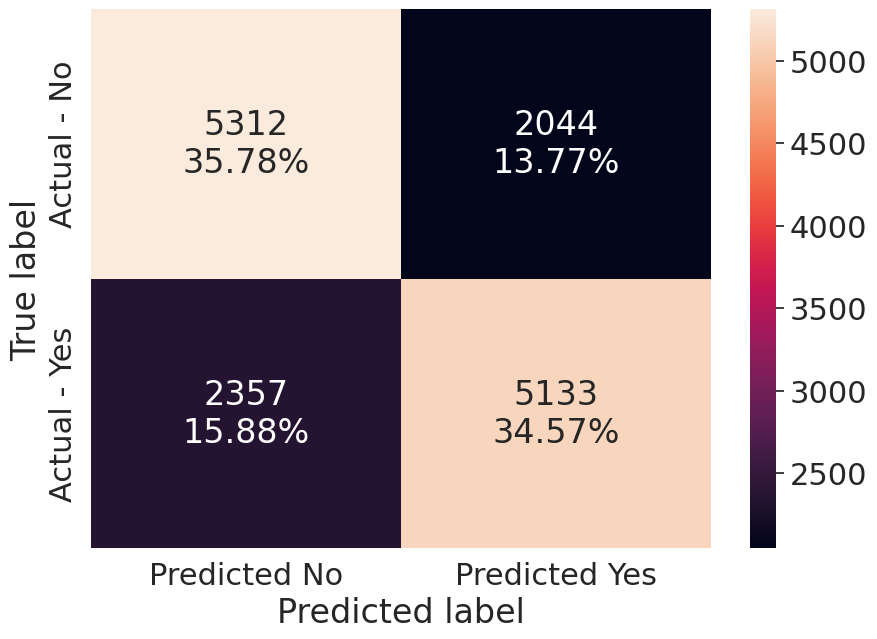

In [ ]:
make_confusion_matrix(bagging,y_train_valid)

In [ ]:
get_recall_score(bagging)

Recall on training set:  0.9731086617808298
Recall on test set:  0.6853137516688919


## **Observation**
* Model is performing good on training data but not as good on testing data
* Model is overfitting

Lets checks for RandomForest classifier

# **RandomForest Classifier**

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_train,y_train_train)

RandomForestClassifier(random_state=1)

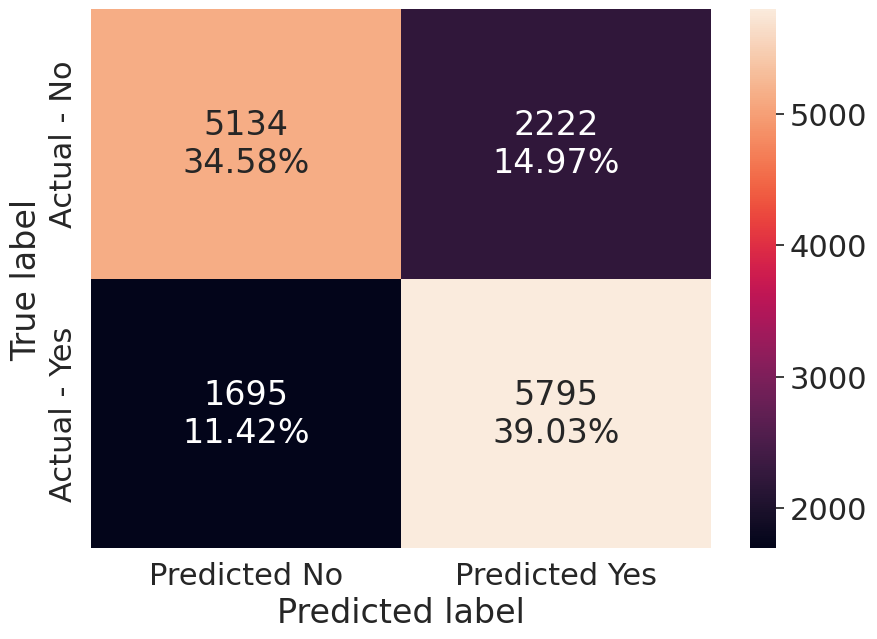

In [ ]:
make_confusion_matrix(rf,y_train_valid)

In [ ]:
get_recall_score(rf)

Recall on training set:  0.9951526343124243
Recall on test set:  0.7736982643524699


## **Tunning Bagging Classifier**

In [ ]:
# Create a base classifier (Decision Tree with class weights)
cl1 = DecisionTreeClassifier(max_depth=3, max_features='log2',min_impurity_decrease=0.0001,random_state=1)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'base_estimator': [cl1],
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

# Create the BaggingClassifier with default parameters (you can customize them if needed)
bagging_classifier = BaggingClassifier(random_state=1, bootstrap=True)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(bagging_classifier, param_distributions=param_dist, scoring='recall', cv=5, n_iter=10, random_state=1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train_train,y_train_train)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
                   param_distributions={'base_estimator': [DecisionTreeClassifier(max_depth=3,
                                                                                  max_features='log2',
                                                                                  min_impurity_decrease=0.0001,
                                                                                  random_state=1)],
                                        'max_features': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': [5, 7, 15, 51, 101]},
                   random_state=1, scoring='recall')

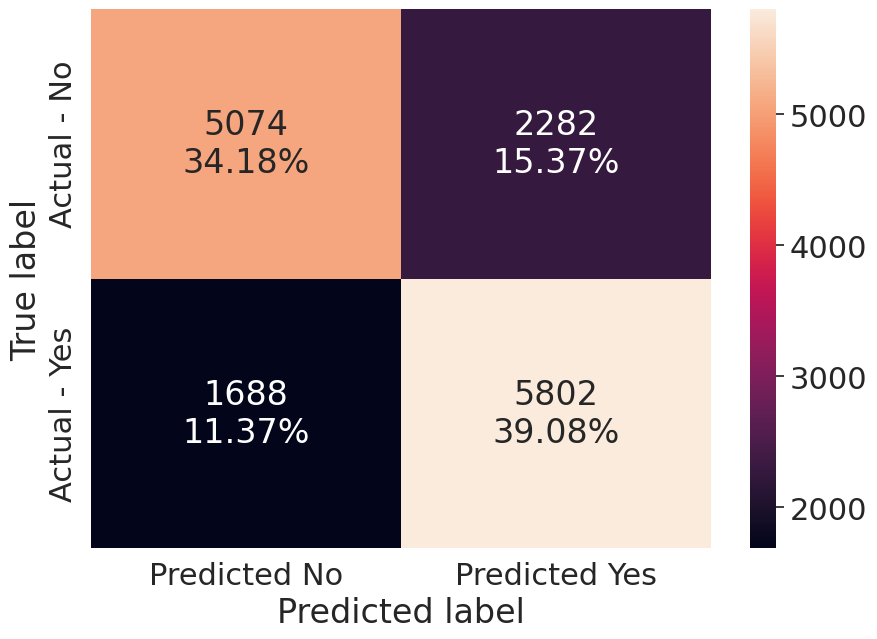

In [ ]:
make_confusion_matrix(random_search,y_train_valid)

In [ ]:
get_recall_score(random_search)

Recall on training set:  0.787581510762306
Recall on test set:  0.7746328437917223


## Observation:
* Model is performing well on both data
* Recall on training set:  0.787581510762306
* Recall on test set:  0.7746328437917223

# **Boosting Model**

# **AdaBoost Classifier**

### AdaBoost
AdaBoost stands for Adaptive Boosting. It's a powerful technique that combines multiple weak learners (like decision trees) to create a more accurate and robust ensemble model.


**Number of estimators:**
This controls how many weak learners are used in the ensemble. More estimators can lead to better accuracy, but also longer training time.
                     
**Learning rate:**
This determines how much weight is given to each new model. A lower learning rate can help prevent overfitting, while a higher learning rate can make the model learn faster.
              
**Base estimator:**
This specifies the type of weak learner to use (e.g., decision tree, linear model). Different learners have different strengths and weaknesses, so choosing the right one can impact performance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train_train,y_train_train)

AdaBoostClassifier(random_state=1)

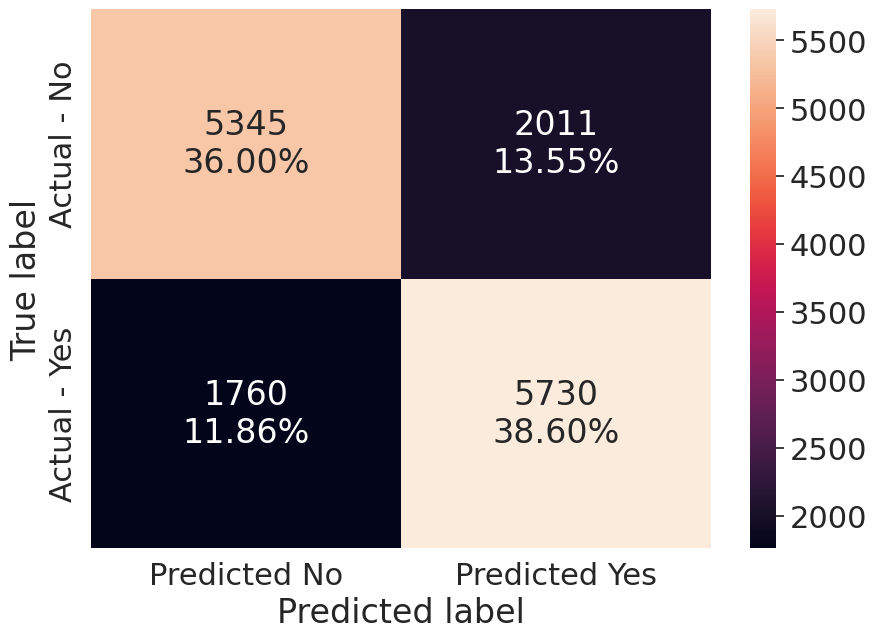

In [ ]:
make_confusion_matrix(ada,y_train_valid)

In [ ]:
get_recall_score(ada)

Recall on training set:  0.7738473079808413
Recall on test set:  0.7650200267022697


## **Observation**
* Its perform well on both trining and testing dataset
* Recall on training set:  0.7738473079808413
* Recall on test set:  0.7650200267022697

# **Hyper Parameter tunning on AdaBoost Classifier**

In [ ]:

# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10, 100,10),
              'learning_rate': [1, 0.1, 0.5, 0.01]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train_train, y_train_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

ab_tuned.fit(X_train_train,y_train_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=90, random_state=1)

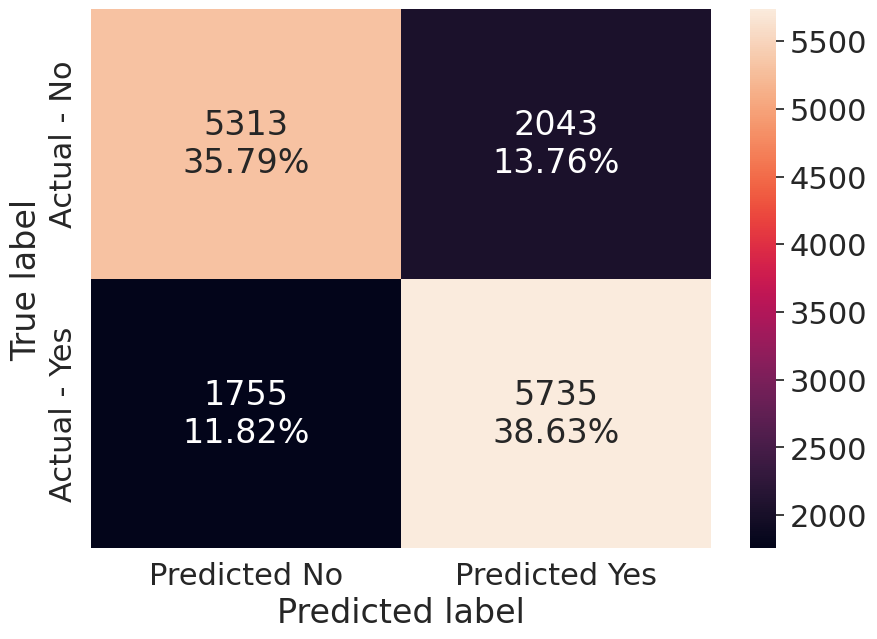

In [ ]:
make_confusion_matrix(ab_tuned,y_train_valid)

In [ ]:
get_recall_score(ab_tuned)

Recall on training set:  0.7741358416527209
Recall on test set:  0.7656875834445928


# **Observation**
* Not to difference
* Recall on training set:  0.7741358416527209
* Recall on test set:  0.7656875834445928

# **Gradient boosting**
It builds a series of weak learners (usually decision trees) sequentially, where each new learner corrects the errors of the previous one. The final model is an additive combination of these weak learners, and the learning process is guided by the gradient of the loss function.


**Hyperparameters of Gradient Boosting:**

**Learning Rate (or Shrinkage):** How much each team member learns from the mistakes of the previous ones.

**Number of Trees (or n_estimators)**: How many team members (models) we want to train in total.

**Max Depth (or max_depth):** How much each team member can specialize in certain details.

**Subsample:** How much of the training data each team member gets to see, introducing a bit of randomness.

Min Samples Split (or min_samples_split): The minimum number of examples needed to teach a new detail.

Min Samples Leaf (or min_samples_leaf): The minimum number of examples needed for a specific detail.

**Max Features (or max_features):** How many different things each team member can focus on, adding randomness.

**Loss Function:** What we're trying to improve or minimize during training, like how wrong the team is in its predictions.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gd_estimator =GradientBoostingClassifier(random_state=1)
gd_estimator.fit(X_train_train,y_train_train)

GradientBoostingClassifier(random_state=1)

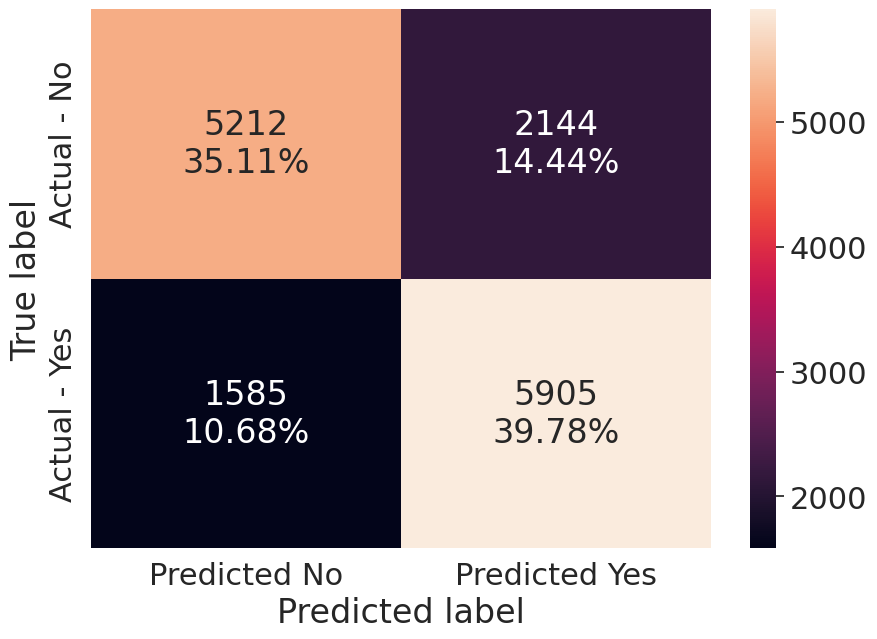

In [ ]:
make_confusion_matrix(gd_estimator,y_train_valid)

In [ ]:
get_recall_score(gd_estimator)

Recall on training set:  0.7989497374343586
Recall on test set:  0.7883845126835781


# **Hyper Parameter Tunning for Gradiant Boosting**

In [ ]:
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50, 200, 25),
              'subsample': [0.7, 0.8, 0.9, 1],
              'max_features': [0.7, 0.8, 0.9, 1],
              'max_depth': [3, 5, 7, 10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
gd_obj = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer, cv=5,n_iter=50)
gd_obj = gd_obj.fit(X_train_train, y_train_train)

# Set the clf to the best combination of parameters
gb_tuned = gd_obj.best_estimator_

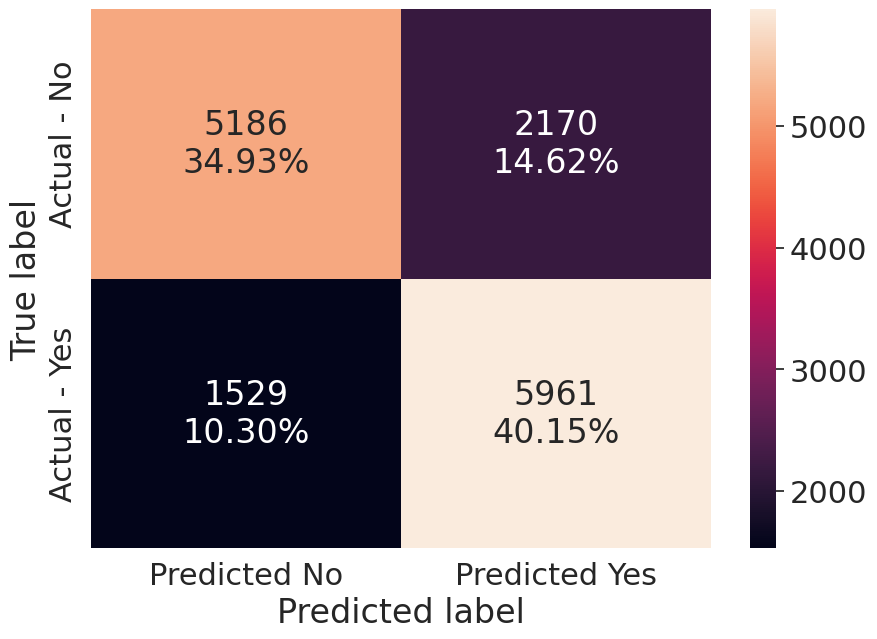

In [ ]:
make_confusion_matrix(gb_tuned,y_train_valid)

In [ ]:
get_recall_score(gb_tuned)

Recall on training set:  0.8119914594033124
Recall on test set:  0.7958611481975968


# **XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_estimator = XGBClassifier()
xgb_estimator.fit(X_train_train,y_train_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

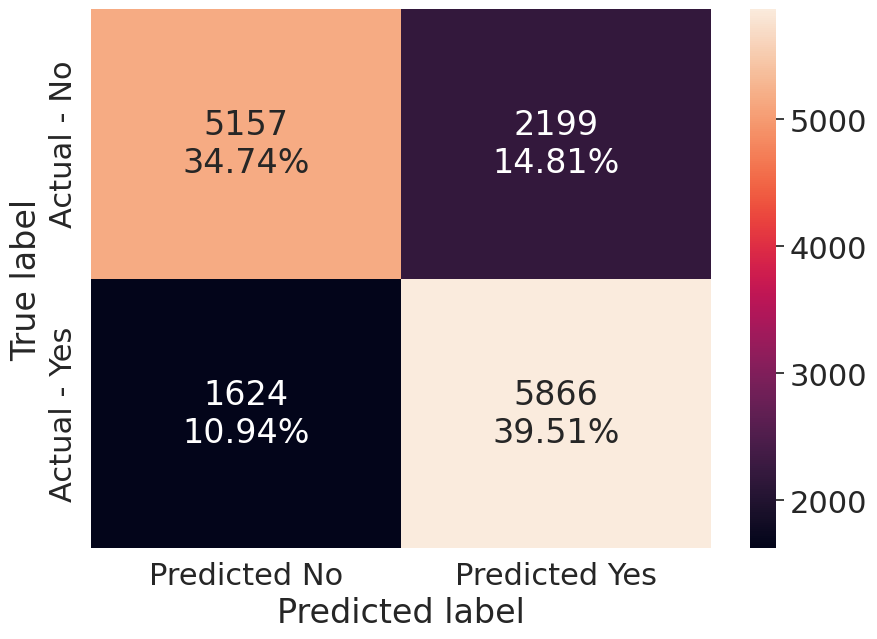

In [ ]:
make_confusion_matrix(xgb_estimator,y_train_valid)

In [ ]:
get_recall_score(xgb_estimator)

Recall on training set:  0.842749148825668
Recall on test set:  0.7831775700934579


# Hyper Parameter Tunning for XGBoost Classifier

In [ ]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [100, 150, 200],
    'subsample': [0.8, 0.9, 1.0],
    'gamma':  [0.1, 0.5, 1.0,2,3],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'colsample_by_node': [0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [1, 5, 10],
    'max_depth': [3, 4, 5],  # Added max_depth
    'min_child_weight': [1, 2, 3]  # Added min_child_weight
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer, cv=10, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(X_train_train, y_train_train)

# Set the clf to the best combination of parameters
xgb_tuned_randomized = randomized_search_obj.best_estimator_

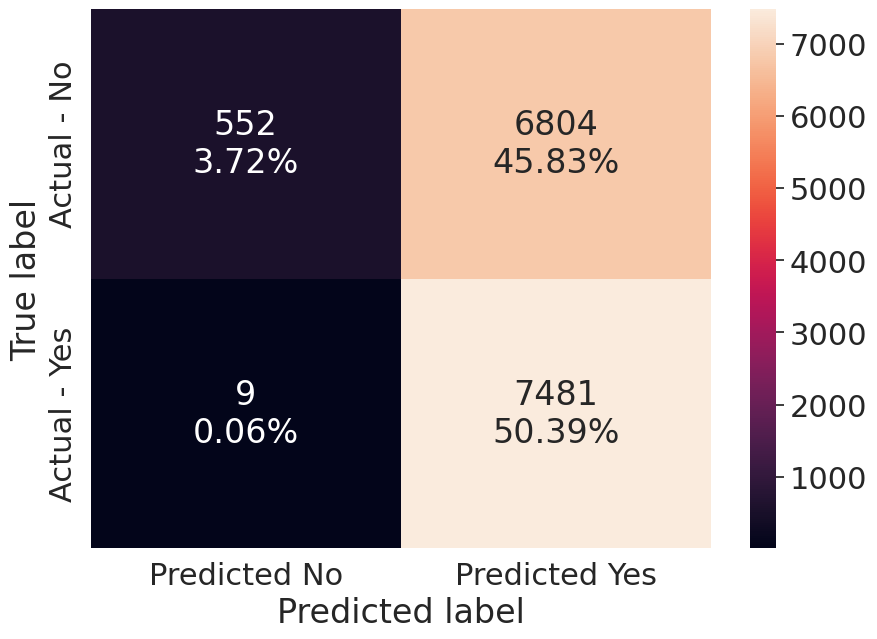

In [ ]:
make_confusion_matrix(xgb_tuned_randomized,y_train_valid)

In [ ]:
get_recall_score(randomized_search_obj)

Recall on training set:  0.9989612787812338
Recall on test set:  0.9987983978638184


In [ ]:
randomized_search_obj.predict_proba((X_train_train))[:,1].shape

(34638,)

# Adjustting the cutoff value

In [ ]:
final = gb_tuned

In [ ]:
train_pred_prob = final.predict_proba(X_train_train)[:,1]
train_pred_prob

array([0.45978581, 0.79456296, 0.11497225, ..., 0.8872964 , 0.56233363,
       0.85353747])

In [ ]:
column_names = ['Cutoff_Prob','TP','FN','TN','FP','P','N']

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0,1.01,0.01)

for cutoff in Cutoff_Prob:
    y_train_train['pred_y'] = (train_pred_prob > cutoff).astype('int64')
    TP = np.logical_and((y_train_train.pred_y == 1), (y_train_train.Diabetes == 1)).sum()
    FN = np.logical_and((y_train_train.pred_y == 0), (y_train_train.Diabetes == 1)).sum()
    TN = np.logical_and((y_train_train.pred_y == 0), (y_train_train.Diabetes == 0)).sum()
    FP = np.logical_and((y_train_train.pred_y == 1), (y_train_train.Diabetes == 0)).sum()

    P = TP + FN
    N = TN + FP

    temp_data = {'Cutoff_Prob': cutoff,
                "TP": TP,
                "FN": FN,
                "TN": TN,
                "FP": FP,
                "P": P,
                "N": N}

    cutoff_data  = cutoff_data.append(temp_data,ignore_index=True)

# Dropping the pred_y colommns from y_train data
y_train_train.drop('pred_y',axis=1,inplace=True)

In [ ]:
cutoff_data['Sn'] = cutoff_data['TP']/cutoff_data['P']
cutoff_data['Sp'] = cutoff_data['TN']/cutoff_data['N']
cutoff_data['Dist'] = ((1-cutoff_data['Sn'])**2 + (1-cutoff_data['Sp'])**2)**0.5
cutoff_data['KS'] = ((cutoff_data['TP']/cutoff_data['P']) - (cutoff_data['FP']/cutoff_data['N'])).abs()
cutoff_data['Re'] =  cutoff_data['TP']/cutoff_data['P']
cutoff_data['Pr'] = cutoff_data['TP']/(cutoff_data['TP'] + cutoff_data['FP'])
cutoff_data['tpr'] = cutoff_data['Re']
cutoff_data['fpr'] = 1 - cutoff_data['Sp']
cutoff_data['f1'] = 2 * (cutoff_data['Pr'] * cutoff_data['Re'])/(cutoff_data['Pr'] + cutoff_data['Re'])



In [ ]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data['Dist']),'Cutoff_Prob']
ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data['KS']),'Cutoff_Prob']
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data['f1']),'Cutoff_Prob']

In [ ]:
cutoffs = [dist_cutoff,ks_cutoff,f1_cutoff]

for cutoff in cutoffs:
    y_pred_train = (final.predict_proba(X_train_train)[:,1] > cutoff).astype(int)
    y_pred_test = (final.predict_proba(X_train_valid)[:,1] > cutoff).astype(int)

    print('Using the cutoff value as : ', cutoff)
    print('Accuracy on train data: ',accuracy_score(y_train_train,y_pred_train))
    print('Accuracy on test data : ',accuracy_score(y_train_valid,y_pred_test))
    print('Recall on train data: ', recall_score(y_train_train,y_pred_train))
    print('Recall on test data: ', recall_score(y_train_valid,y_pred_test))
    print('Pression on train data: ',precision_score(y_train_train,y_pred_train))
    print('Precision on test data: ',precision_score(y_train_valid,y_pred_test))
    print('f1 score on train data: ',f1_score(y_train_train,y_pred_train))
    print('f1 score on train data: ',f1_score(y_train_valid,y_pred_test))
    print('\n')



Using the cutoff value as :  0.54
Accuracy on train data:  0.7647958889081355
Accuracy on test data :  0.746800484979119
Recall on train data:  0.7789832073402966
Recall on test data:  0.758611481975968
Pression on train data:  0.7576897171082173
Precision on test data:  0.7443993187475436
f1 score on train data:  0.7681889315692132
f1 score on train data:  0.7514382067050187


Using the cutoff value as :  0.49
Accuracy on train data:  0.7660373000750621
Accuracy on test data :  0.7514482015357672
Recall on train data:  0.8206474695596976
Recall on test data:  0.803871829105474
Pression on train data:  0.7400218556486444
Precision on test data:  0.7305265712205775
f1 score on train data:  0.778252065889564
f1 score on train data:  0.7654462242562928


Using the cutoff value as :  0.4
Accuracy on train data:  0.7610716554073561
Accuracy on test data :  0.7460595446584939
Recall on train data:  0.8824513820762883
Recall on test data:  0.864218958611482
Pression on train data:  0.71023175

# **Testing Gradiant Boosting model on final test dataset**

In [ ]:
final_test_pred  = final.predict(X_test)

In [ ]:
recall_score(y_test,final_test_pred)

0.7969981951173174

In [ ]:
precision_score(y_test,final_test_pred)

0.7327510917030567

# **Here Our Final Model is GradiantBoostClassifier**

* which perform good ontrain as well as final test data.


In [ ]:
get_recall_score(final)

Recall on training set:  0.8119914594033124
Recall on test set:  0.7958611481975968


In [ ]:
train_pred = final.predict(X_train_train)
test_pred = final.predict(X_test)

In [ ]:
recall_score(y_test,test_pred)
precision_score(y_test,test_pred)
f1_score(y_test,test_pred)

0.763525503935933

In [ ]:
confusion_matrix(y_test,final_test_pred)

array([[7621, 3060],
       [2137, 8390]])

In [ ]:
# test_pred = (final.predict_proba(X_test)[:,1] > 0.5).astype(int)
# print('Using the cutoff value as : ', cutoff)
print('Accuracy on train data: ',accuracy_score(y_train_train,train_pred))
print('Accuracy on test data : ',accuracy_score(y_test,test_pred))
print('Recall on train data: ', recall_score(y_train_train,train_pred))
print('Recall on test data: ', recall_score(y_test,test_pred))
print('Pression on train data: ',precision_score(y_train_train,train_pred))
print('Precision on test data: ',precision_score(y_test,test_pred))
print('f1 score on train data: ',f1_score(y_train_train,train_pred))
print('f1 score on test data: ',f1_score(y_test,test_pred))
print('\n')

Accuracy on train data:  0.7654021594780299
Accuracy on test data :  0.7549509619011694
Recall on train data:  0.8119914594033124
Recall on test data:  0.7969981951173174
Pression on train data:  0.742964253656476
Precision on test data:  0.7327510917030567
f1 score on train data:  0.7759457372890702
f1 score on test data:  0.763525503935933




In [ ]:
gd_obj.best_estimator_

GradientBoostingClassifier(max_depth=5, max_features=0.7, n_estimators=75,
                           random_state=1, subsample=1)

In [ ]:
# # creating new pipeline with best parameters
# model = Pipeline(
#     steps=[
#         # ("pre", preprocessor),
#         (  'GB',
#             GradientBoostingClassifier(
#             max_depth=5,
#             max_features=0.7,
#             n_estimators=75,
#             random_state=1,
#             subsample=1
#         ),
#         ),
#     ]
# )
# # Fit the model on training data
# model.fit(X_train_train,y_train_train)

# Creating Pipeline

In [ ]:
def get_pipe(estimator):

  """
  Data passed to this pipeline would be scaled by MinMaxScaler and then fitted to the input classifier next.
  """
  return Pipeline([('scaler', MinMaxScaler()), ('estimator', estimator)])

In [ ]:
model  = get_pipe(GradientBoostingClassifier(
            max_depth=5,
            max_features=0.7,
            n_estimators=75,
            random_state=1,
            subsample=1
        )
)

In [ ]:
model.fit(X_train_train,y_train_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator',
                 GradientBoostingClassifier(max_depth=5, max_features=0.7,
                                            n_estimators=75, random_state=1,
                                            subsample=1))])

In [ ]:
train_pred = model.predict(X_train_train)
test_pred = model.predict(X_test)

In [ ]:
# test_pred = (final.predict_proba(X_test)[:,1] > 0.5).astype(int)
# print('Using the cutoff value as : ', cutoff)
print('Accuracy on train data: ',accuracy_score(y_train_train,train_pred))
print('Accuracy on test data : ',accuracy_score(y_test,test_pred))
print('Recall on train data: ', recall_score(y_train_train,train_pred))
print('Recall on test data: ', recall_score(y_test,test_pred))
print('Pression on train data: ',precision_score(y_train_train,train_pred))
print('Precision on test data: ',precision_score(y_test,test_pred))
print('f1 score on train data: ',f1_score(y_train_train,train_pred))
print('f1 score on test data: ',f1_score(y_test,test_pred))
print('\n')

Accuracy on train data:  0.7654021594780299
Accuracy on test data :  0.7549509619011694
Recall on train data:  0.8119914594033124
Recall on test data:  0.7969981951173174
Pression on train data:  0.742964253656476
Precision on test data:  0.7327510917030567
f1 score on train data:  0.7759457372890702
f1 score on test data:  0.763525503935933




# **Observation:**
* **Accuracy** on train data:  0.7654021594780299
* **Accuracy** on final test data :  0.7549509619011694
* **Recall** on train data:  0.8119914594033124
* **Recall** on final test data:  0.7969981951173174
* **Pression** on train data:  0.742964253656476
* **Precision** on final test data:  0.7327510917030567
* **f1 score** on train data:  0.7759457372890702
* **f1 score** on final test data:  0.763525503935933

# **Conclusions**


* Our diabetes detection model, built on a gradient boosting classifier, has demonstrated robust performance with an accuracy exceeding 76% on both training and 75% on test datasets. Key features contributing to predictions have been identified, providing valuable insights into the model's decision-making process. The model's success is underscored by rigorous evaluation metrics, including precision, recall, and F1 score.

* Through meticulous analysis, we addressed challenges such as fine-tuned hyperparameters, ensuring the model's generalization capabilities. Going beyond accuracy, we emphasized model interpretability through feature importance analysis, fostering transparency in healthcare decision-making.

* Looking ahead, considerations for real-world deployment have been outlined, emphasizing the need for continuous monitoring and adaptation. Collaboration with domain experts and user feedback will be integral to refining the model's effectiveness over time. Our success lays the foundation for future enhancements, exploring additional features and potential applications to further improve healthcare outcomes.